In [1]:
import numpy as np
from numpy import genfromtxt

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from pandas import read_csv

import csv
import pprint

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers, models

import keras
#from keras.utils import to_categorical
from pandas import read_csv
from keras.models import Sequential
from keras import layers
#from keras.optimizers import SGD
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import SGD

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint

from sklearn.preprocessing import LabelEncoder
import gspread
import pandas as pd
import pickle 
import pywt
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
#from keras.utils import to_categorical

from time import time
t00 = time()
import os
from tensorflow.keras import layers
from keras.layers import Input, Dense, concatenate
from keras.models import Model

In [2]:
# Initialize the TPU and spread the computations across the 8 cores
import tensorflow as tf 
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
tf.config.list_logical_devices('TPU')
#print("All devices: ", tf.config.list_logical_devices('TPU'))

strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.101.210.218:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.101.210.218:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [3]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
N_cut = 52

# Aminoacids

# 0 - 4 
DL_Alpha_Alanine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Alpha_Alanine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Alpha_Alanine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Alpha_Alanine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Aspartic_Acid_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Aspartic_Acid_Train.csv", delimiter=',', names=True, dtype=float)
DL_Aspartic_Acid_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Aspartic_Acid_Test.csv", delimiter=',', names=True, dtype=float)

DL_Isoleucine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Isoleucine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Isoleucine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Isoleucine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Leucine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Leucine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Leucine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Leucine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Methionine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Methionine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Methionine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Methionine_Test.csv", delimiter=',', names=True, dtype=float)

# 5 - 9 

DL_Phenylalanine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Phenylalanine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Phenylalanine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Phenylalanine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Serine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Serine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Serine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Serine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Threonine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Threonine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Threonine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Threonine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Tyrosine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Tyrosine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Tyrosine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Tyrosine_Test.csv", delimiter=',', names=True, dtype=float)

DL_Valine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Valine_Train.csv", delimiter=',', names=True, dtype=float)
DL_Valine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/DL_Valine_Test.csv", delimiter=',', names=True, dtype=float)

# 10 - 14

Glycine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Glycine_Train.csv", delimiter=',', names=True, dtype=float)
Glycine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Glycine_Test.csv", delimiter=',', names=True, dtype=float)

L_Arginine_HCl_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Arginine_HCl_Train.csv", delimiter=',', names=True, dtype=float)
L_Arginine_HCl_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Arginine_HCl_Test.csv", delimiter=',', names=True, dtype=float)

L_Asparagine_Monohydrate_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Asparagine_Monohydrate_Train.csv", delimiter=',', names=True, dtype=float)
L_Asparagine_Monohydrate_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Asparagine_Monohydrate_Test.csv", delimiter=',', names=True, dtype=float)

L_Cystine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Cystine_Train.csv", delimiter=',', names=True, dtype=float)
L_Cystine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Cystine_Test.csv", delimiter=',', names=True, dtype=float)

L_Glutamic_Acid_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Glutamic_Acid_Train.csv", delimiter=',', names=True, dtype=float)
L_Glutamic_Acid_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Glutamic_Acid_Test.csv", delimiter=',', names=True, dtype=float)

# 15 - 19

L_Histidine_HCl_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Histidine_HCl_Train.csv", delimiter=',', names=True, dtype=float)
L_Histidine_HCl_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Histidine_HCl_Test.csv", delimiter=',', names=True, dtype=float)

L_Lysine_HCl_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Lysine_HCl_Train.csv", delimiter=',', names=True, dtype=float)
L_Lysine_HCl_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Lysine_HCl_Test.csv", delimiter=',', names=True, dtype=float)

L_PLUS_Cysteine_HCl_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_PLUS_Cysteine_HCl_Train.csv", delimiter=',', names=True, dtype=float)
L_PLUS_Cysteine_HCl_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_PLUS_CysteineHydrochloride_Test.csv", delimiter=',', names=True, dtype=float)

L_Proline_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Proline_Train.csv", delimiter=',', names=True, dtype=float)
L_Proline_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Proline_Test.csv", delimiter=',', names=True, dtype=float)

L_Tryptophan_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Tryptophan_Train.csv", delimiter=',', names=True, dtype=float)
L_Tryptophan_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/L_Tryptophan_Test.csv", delimiter=',', names=True, dtype=float)

# Other chemicals
# 20 - 24

Ampicillin_Sodium_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Ampicillin_Sodium_Train.csv", delimiter=',', names=True, dtype=float)
Ampicillin_Sodium_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Ampicillin_Sodium_Test.csv", delimiter=',', names=True, dtype=float)

Anthrone_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Anthrone_Train.csv", delimiter=',', names=True, dtype=float)
Anthrone_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Anthrone_Test.csv", delimiter=',', names=True, dtype=float)

beta_Estradiol_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/beta_Estradiol_Train.csv", delimiter=',', names=True, dtype=float)
beta_Estradiol_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/beta_Estradiol_Test.csv", delimiter=',', names=True, dtype=float)

CHAPS_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/CHAPS_Train.csv", delimiter=',', names=True, dtype=float)
CHAPS_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/CHAPS_Test.csv", delimiter=',', names=True, dtype=float)

Chloroquine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Chloroquine_Train.csv", delimiter=',', names=True, dtype=float)
Chloroquine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Chloroquine_Test.csv", delimiter=',', names=True, dtype=float)

# 25 - 29

D_PLUS_Maltose_Monohydrate_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/D_PLUS_Maltose_Monohydrate_Train.csv", delimiter=',', names=True, dtype=float)
D_PLUS_Maltose_Monohydrate_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/D_PLUS_MaltoseMonohydrate_Test.csv", delimiter=',', names=True, dtype=float)

Fluconazole_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Fluconazole_Train.csv", delimiter=',', names=True, dtype=float)
Fluconazole_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Fluconazole_Test.csv", delimiter=',', names=True, dtype=float)

Forskolin_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Forskolin_Train.csv", delimiter=',', names=True, dtype=float)
Forskolin_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Forskolin_Test.csv", delimiter=',', names=True, dtype=float)

Laminarin_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Laminarin_Train.csv", delimiter=',', names=True, dtype=float)
Laminarin_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Laminarin_Test.csv", delimiter=',', names=True, dtype=float)

Lauric_Acid_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Lauric_Acid_Train.csv", delimiter=',', names=True, dtype=float)
Lauric_Acid_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Lauric_Acid_Test.csv", delimiter=',', names=True, dtype=float)

# 30 - 34

Methyl_Viologen_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Methyl_Viologen_Train.csv", delimiter=',', names=True, dtype=float)
Methyl_Viologen_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Methyl_Viologen_Test.csv", delimiter=',', names=True, dtype=float)

MOPS_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/MOPS_Train.csv", delimiter=',', names=True, dtype=float)
MOPS_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/MOPS_Test.csv", delimiter=',', names=True, dtype=float)

Na_Salt_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Na_Salt_Train.csv", delimiter=',', names=True, dtype=float)
Na_Salt_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Na_Salt_Test.csv", delimiter=',', names=True, dtype=float)

Polyvinyl_Pyrrolidone_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Polyvinyl_Pyrrolidone_Train.csv", delimiter=',', names=True, dtype=float)
Polyvinyl_Pyrrolidone_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Polyvinyl_Pyrrolidone_Test.csv", delimiter=',', names=True, dtype=float)

Potato_Starch_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Potato_Starch_Train.csv", delimiter=',', names=True, dtype=float)
Potato_Starch_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Potato_Starch_Test.csv", delimiter=',', names=True, dtype=float)

# 35 - 39

Progesterone_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Progesterone_Train.csv", delimiter=',', names=True, dtype=float)
Progesterone_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Progesterone_Test.csv", delimiter=',', names=True, dtype=float)

Sodium_Deoxycholate_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Sodium_Deoxycholate_Train.csv", delimiter=',', names=True, dtype=float)
Sodium_Deoxycholate_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Sodium_Deoxycholate_Test.csv", delimiter=',', names=True, dtype=float)

Sodium_Dodecylsulfate_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Sodium_Dodecylsulfate_Train.csv", delimiter=',', names=True, dtype=float)
Sodium_Dodecylsulfate_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Sodium_Dodecylsulfate_Test.csv", delimiter=',', names=True, dtype=float)

Uridine_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Uridine_Train.csv", delimiter=',', names=True, dtype=float)
Uridine_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Uridine_Test.csv", delimiter=',', names=True, dtype=float)

Silver_Nitrate_Train = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Silver_Nitrate_Train.csv", delimiter=',', names=True, dtype=float)
Silver_Nitrate_Test = genfromtxt("/content/gdrive/MyDrive/6_21_2021_run/Silver_Nitrate_Test.csv", delimiter=',', names=True, dtype=float)

In [5]:
N_cut = 52
N_classes = 20
N_ignored = 10

train_data = np.zeros(((N_classes + N_ignored)*2500, 1024 - N_cut))
train_label = np.zeros((N_classes + N_ignored)*2500)

for i in range(1024 - N_cut - 1):
    for j in range(2500):
        
        # DL_Alpha_Alanine_Train, label 0
        train_data[j][i] = (DL_Alpha_Alanine_Train[i + N_cut][j])
        train_label[j] = 0
        
        # DL_Aspartic_Acid_Train, label 1
        train_data[j + 1*2500][i] = (DL_Aspartic_Acid_Train[i + N_cut][j])
        train_label[j + 1*2500] = 1
        
        # DL_Isoleucine_Train, label 2
        train_data[j + 2*2500][i] = (DL_Isoleucine_Train[i + N_cut][j])
        train_label[j + 2*2500] = 2
        
        # DL_Leucine_Train, label 3
        train_data[j + 3*2500][i] = (DL_Leucine_Train[i + N_cut][j])
        train_label[j + 3*2500] = 3
        
        # DL_Methionine_Train, label 4
        train_data[j + 4*2500][i] = (DL_Methionine_Train[i + N_cut][j])
        train_label[j + 4*2500] = 4
        
        # DL_Phenylalanine_Train, label 5
        train_data[j + 5*2500][i] = (DL_Phenylalanine_Train[i + N_cut][j])
        train_label[j + 5*2500] = 5
        
        # DL_Serine_Train, label 6
        train_data[j + 6*2500][i] = (DL_Serine_Train[i + N_cut][j])
        train_label[j + 6*2500] = 6
        
        # DL_Serine_Train, label 7
        train_data[j + 7*2500][i] = (DL_Threonine_Train[i + N_cut][j])
        train_label[j + 7*2500] = 7
        
        # DL_Tyrosine_Train, label 8
        train_data[j + 8*2500][i] = (DL_Tyrosine_Train[i + N_cut][j])
        train_label[j + 8*2500] = 8
        
        # DL_Valine_Train, label 9
        train_data[j + 9*2500][i] = (DL_Valine_Train[i + N_cut][j])
        train_label[j + 9*2500] = 9
        
        # Glycine_Train, label 10
        train_data[j + 10*2500][i] = (Glycine_Train[i + N_cut][j])
        train_label[j + 10*2500] = 10
        
        # L_Arginine_HCl_Train, label 11
        train_data[j + 11*2500][i] = (L_Arginine_HCl_Train[i + N_cut][j])
        train_label[j + 11*2500] = 11
        
        # L_Asparagine_Monohydrate_Train, label 12
        train_data[j + 12*2500][i] = (L_Asparagine_Monohydrate_Train[i + N_cut][j])
        train_label[j + 12*2500] = 12
        
        # L_Cystine_Train, label 13
        train_data[j + 13*2500][i] = (L_Cystine_Train[i + N_cut][j])
        train_label[j + 13*2500] = 13
        
        # L_Glutamic_Acid_Train, label 14
        train_data[j + 14*2500][i] = (L_Glutamic_Acid_Train[i + N_cut][j])
        train_label[j + 14*2500] = 14
        
        # L_Histidine_HCl_Train, label 15
        train_data[j + 15*2500][i] = (L_Histidine_HCl_Train[i + N_cut][j])
        train_label[j + 15*2500] = 15
        
        # L_Lysine_HCl_Train, label 16
        train_data[j + 16*2500][i] = (L_Lysine_HCl_Train[i + N_cut][j])
        train_label[j + 16*2500] = 16
        
        # L_PLUS_Cysteine_HCl_Train, label 17
        train_data[j + 17*2500][i] = (L_PLUS_Cysteine_HCl_Train[i + N_cut][j])
        train_label[j + 17*2500] = 17
        
        # L_Proline_Train, label 18
        train_data[j + 18*2500][i] = (L_Proline_Train[i + N_cut][j])
        train_label[j + 18*2500] = 18
        
        # L_Tryptophan_Train, label 19
        train_data[j + 19*2500][i] = (L_Tryptophan_Train[i + N_cut][j])
        train_label[j + 19*2500] = 19

        # Ignored
        # Ignored 1

        # Anthrone_Train, label 21
        train_data[j + 20*2500][i] = (Anthrone_Train[i + N_cut][j])
        train_label[j + 20*2500] = 20

        # Ignore 2
        
        # beta_Estradiol_Train, label 22
        train_data[j + 21*2500][i] = (beta_Estradiol_Train[i + N_cut][j])
        train_label[j + 21*2500] = 20

        # Ignore 3
        
        # Chloroquine_Train, label 24
        train_data[j + 22*2500][i] = (Chloroquine_Train[i + N_cut][j])
        train_label[j + 22*2500] = 20

        # Ignore 4
        
        # Fluconazole_Train, label 26
        train_data[j + 23*2500][i] = (Fluconazole_Train[i + N_cut][j])
        train_label[j + 23*2500] = 20

        # Ignore 5
        
        # Laminarin_Train, label 28
        train_data[j + 24*2500][i] = (Laminarin_Train[i + N_cut][j])
        train_label[j + 24*2500] = 20

        # Ignore 6
        
        # Lauric_Acid_Train, label 29
        train_data[j + 25*2500][i] = (Lauric_Acid_Train[i + N_cut][j])
        train_label[j + 25*2500] = 20

        # Ignore 7
        
        # Methyl_Viologen_Train, label 30
        train_data[j + 26*2500][i] = (Methyl_Viologen_Train[i + N_cut][j])
        train_label[j + 26*2500] = 20

        # Ignore 8
        
        # MOPS_Train, label 31
        train_data[j + 27*2500][i] = (MOPS_Train[i + N_cut][j])
        train_label[j + 27*2500] = 20

        # Ignore 9
        
        # Progesterone_Train, label 35
        train_data[j + 28*2500][i] = (Progesterone_Train[i + N_cut][j])
        train_label[j + 28*2500] = 20

        # Ignore 10
        
        # Uridine_Train, label 38
        train_data[j + 29*2500][i] = (Uridine_Train[i + N_cut][j])
        train_label[j + 29*2500] = 20
        
train_rescaled = np.zeros(((N_classes + N_ignored)*2500, 1024 - N_cut))
train_maximum = np.zeros((N_classes + N_ignored)*2500)
train_minimum = np.zeros((N_classes + N_ignored)*2500)

for j in range(1, (N_classes + N_ignored)*2500):
    train_maximum[j] = np.amin(train_data[j][:])
    train_maximum[j] = np.amax(train_data[j][:])

for i in range(1,1024 - N_cut):
    for j in range(1,(N_classes + N_ignored)*2500):
        train_rescaled[j][i] = (train_data[j][i] - train_minimum[j])
        train_rescaled[j][i] = train_rescaled[j][i]/(train_maximum[j] - train_minimum[j])

train_rescaled = train_rescaled.reshape(((N_classes + N_ignored)*2500, 1024 - N_cut, 1))
train_rescaled = train_rescaled.astype('float32')
train_label = train_label.reshape((N_classes + N_ignored)*2500)

train_label = tf.keras.utils.to_categorical(train_label)

train_rescaled_last = np.ones(((N_classes + N_ignored)*2500, 1024 - N_cut))
train_minimum = []

for j in range((N_classes + N_ignored)*2500):
    train_minimum.append(np.amin(train_data[j][:-1]))

for i in range(1024 - N_cut):
    for j in range(N_classes*2500):
        train_rescaled_last[j][i] = (train_data[j][i] - train_minimum[j])

train_rescaled = np.zeros(((N_classes + N_ignored)*2500, 1024 - N_cut - 1))

for i in range(1024 - N_cut - 1):
    for j in range((N_classes + N_ignored)*2500):
      train_rescaled[j][i] = train_rescaled_last[j][i]

train_maximum = []

for j in range((N_classes + N_ignored)*2500):
    train_maximum.append(np.amax(train_rescaled[j][:-1]))
for i in range(1024 - N_cut - 1):
    for j in range(N_classes*2500):
      train_rescaled[j][i] = train_rescaled[j][i]/train_maximum[j]

In [6]:
test_data = np.zeros((N_classes*500, 1024 - N_cut))
test_label = np.zeros(N_classes*500)

for i in range(1024 - N_cut - 1):
    for j in range(500):
        
        # DL_Alpha_Alanine_Test, label 0
        test_data[j][i] = (DL_Alpha_Alanine_Test[i + N_cut][j])
        test_label[j] = 0
        
        # DL_Aspartic_Acid_Test, label 1
        test_data[j + 1*500][i] = (DL_Aspartic_Acid_Test[i + N_cut][j])
        test_label[j + 1*500] = 1
        
        # DL_Isoleucine_Test, label 2
        test_data[j + 2*500][i] = (DL_Isoleucine_Test[i + N_cut][j])
        test_label[j + 2*500] = 2
        
        # DL_Leucine_Test, label 3
        test_data[j + 3*500][i] = (DL_Leucine_Test[i + N_cut][j])
        test_label[j + 3*500] = 3
        
        # DL_Methionine_Test, label 4
        test_data[j + 4*500][i] = (DL_Methionine_Test[i + N_cut][j])
        test_label[j + 4*500] = 4
        
        # DL_Phenylalanine_Test, label 5
        test_data[j + 5*500][i] = (DL_Phenylalanine_Test[i + N_cut][j])
        test_label[j + 5*500] = 5
        
        # DL_Serine_Test, label 6
        test_data[j + 6*500][i] = (DL_Serine_Test[i + N_cut][j])
        test_label[j + 6*500] = 6
        
        # DL_Serine_Test, label 7
        test_data[j + 7*500][i] = (DL_Threonine_Test[i + N_cut][j])
        test_label[j + 7*500] = 7
        
        # DL_Tyrosine_Test, label 8
        test_data[j + 8*500][i] = (DL_Tyrosine_Test[i + N_cut][j])
        test_label[j + 8*500] = 8
        
        # DL_Valine_Test, label 9
        test_data[j + 9*500][i] = (DL_Valine_Test[i + N_cut][j])
        test_label[j + 9*500] = 9
        
        # Glycine_Test, label 10
        test_data[j + 10*500][i] = (Glycine_Test[i + N_cut][j])
        test_label[j + 10*500] = 10
        
        # L_Arginine_HCl_Test, label 11
        test_data[j + 11*500][i] = (L_Arginine_HCl_Test[i + N_cut][j])
        test_label[j + 11*500] = 11
        
        # L_Asparagine_Monohydrate_Test, label 12
        test_data[j + 12*500][i] = (L_Asparagine_Monohydrate_Test[i + N_cut][j])
        test_label[j + 12*500] = 12
        
        # L_Cystine_Test, label 13
        test_data[j + 13*500][i] = (L_Cystine_Test[i + N_cut][j])
        test_label[j + 13*500] = 13
        
        # L_Glutamic_Acid_Test, label 14
        test_data[j + 14*500][i] = (L_Glutamic_Acid_Test[i + N_cut][j])
        test_label[j + 14*500] = 14
        
        # L_Histidine_HCl_Test, label 15
        test_data[j + 15*500][i] = (L_Histidine_HCl_Test[i + N_cut][j])
        test_label[j + 15*500] = 15
        
        # L_Lysine_HCl_Test, label 16
        test_data[j + 16*500][i] = (L_Lysine_HCl_Test[i + N_cut][j])
        test_label[j + 16*500] = 16
        
        # L_PLUS_Cysteine_HCl_Test, label 17
        test_data[j + 17*500][i] = (L_PLUS_Cysteine_HCl_Test[i + N_cut][j])
        test_label[j + 17*500] = 17
        
        # L_Proline_Test, label 18
        test_data[j + 18*500][i] = (L_Proline_Test[i + N_cut][j])
        test_label[j + 18*500] = 18
        
        # L_Tryptophan_Test, label 19
        test_data[j + 19*500][i] = (L_Tryptophan_Test[i + N_cut][j])
        test_label[j + 19*500] = 19

test_rescaled_last = np.ones((N_classes*500, 1024 - N_cut))
test_minimum = []

for j in range(N_classes*500):
    test_minimum.append(np.amin(test_data[j][:-1]))

for i in range(1024 - N_cut):
    for j in range(N_classes*500):
        test_rescaled_last[j][i] = (test_data[j][i] - test_minimum[j])

test_rescaled = np.zeros((N_classes*500, 1024 - N_cut - 1))

for i in range(1024 - N_cut - 1):
    for j in range(N_classes*500):
      test_rescaled[j][i] = test_rescaled_last[j][i]

test_maximum = []

for j in range(N_classes*500):
    test_maximum.append(np.amax(test_rescaled[j][:-1]))

for i in range(1024 - N_cut - 1):
    for j in range(N_classes*500):
      test_rescaled[j][i] = test_rescaled[j][i]/test_maximum[j]

test_rescaled = test_rescaled.reshape((N_classes*500, 1024 - N_cut - 1))
test_rescaled = test_rescaled.astype('float32')
test_label = test_label.reshape(N_classes*500)
#test_label = tf.keras.utils.to_categorical(test_label)

print("Rescaling finished")

Rescaling finished


In [ ]:
#test_label = tf.keras.utils.to_categorical(test_label)

# OK, the ignored and unknown data is the following:

In [7]:
ignored_data = np.zeros((10*500, 1024 - N_cut))
unseen_data = np.zeros((10*500, 1024 - N_cut))


for i in range(1024 - N_cut - 1):
    for j in range(500):

        # Ignored

        # Ignored 1
        # Anthrone_Test, label 21
        ignored_data[j + 0*500][i] = (Anthrone_Test[i + N_cut][j])
        
        # Ignore 2
        # beta_Estradiol_Test, label 22
        ignored_data[j + 1*500][i] = (beta_Estradiol_Test[i + N_cut][j])

        # Ignore 3
        # Chloroquine_Test, label 24
        ignored_data[j + 2*500][i] = (Chloroquine_Test[i + N_cut][j])

        # Ignore 4
        # Fluconazole_Test, label 26
        ignored_data[j + 3*500][i] = (Fluconazole_Test[i + N_cut][j])

        # Ignore 5
        # Laminarin_Test, label 28
        ignored_data[j + 4*500][i] = (Laminarin_Test[i + N_cut][j])

        # Ignore 6
        # Lauric_Acid_Test, label 29
        ignored_data[j + 5*500][i] = (Lauric_Acid_Test[i + N_cut][j])

        # Ignore 7
        # Methyl_Viologen_Test, label 30
        ignored_data[j + 6*500][i] = (Methyl_Viologen_Test[i + N_cut][j])

        # Ignore 8
        # MOPS_Test, label 31
        ignored_data[j + 7*500][i] = (MOPS_Test[i + N_cut][j])

        # Ignore 9
        # Progesterone_Test, label 35
        ignored_data[j + 8*500][i] = (Progesterone_Test[i + N_cut][j])
        
        # Ignore 10  
        # Uridine_Test, label 38
        ignored_data[j + 9*500][i] = (Uridine_Test[i + N_cut][j])


        # Never Seen Before

        # Never seen 1
        # Ampicillin_Sodium_Test, label 20
        unseen_data[j + 0*500][i] = (Ampicillin_Sodium_Test[i + N_cut][j])
        
        # Never seen 2
        # CHAPS_Test, label 23
        unseen_data[j + 1*500][i] = (CHAPS_Test[i + N_cut][j])

        # Never seen 3
        # D_PLUS_Maltose_Monohydrate_Test, label 25
        unseen_data[j + 2*500][i] = (D_PLUS_Maltose_Monohydrate_Test[i + N_cut][j])
        
        # Never seen 4
        # Forskolin_Test, label 27
        unseen_data[j + 3*500][i] = (Forskolin_Test[i + N_cut][j])
        
        # Never seen 5
        # Na_Salt_Test, label 32
        unseen_data[j + 4*500][i] = (Na_Salt_Test[i + N_cut][j])

        # Never seen 6
        # Polyvinyl_Pyrrolidone_Test, label 33
        unseen_data[j + 5*500][i] = (Polyvinyl_Pyrrolidone_Test[i + N_cut][j])

        # Never seen 7
        # Potato_Starch_Test, label 34
        unseen_data[j + 6*500][i] = (Potato_Starch_Test[i + N_cut][j])

        # Never seen 8
        # Sodium_Deoxycholate_Test, label 36
        unseen_data[j + 7*500][i] = (Sodium_Deoxycholate_Test[i + N_cut][j])
        
        # Never seen 9
        # Sodium_Dodecylsulfate_Test, label 37
        unseen_data[j + 8*500][i] = (Sodium_Dodecylsulfate_Test[i + N_cut][j])

        # Never seen 10
        # Silver_Nitrate_Test, label 39
        unseen_data[j + 9*500][i] = (Silver_Nitrate_Test[i + N_cut][j])

ignored_data_rescaled = np.zeros((10*500, 1024 - N_cut))
ignored_data_maximum = np.zeros(10*500)
ignored_data_minimum = np.zeros(10*500)

for j in range(1, 10*500):
    ignored_data_minimum[j] = np.amin(ignored_data[j][:])
    ignored_data_maximum[j] = np.amax(ignored_data[j][:])

for i in range(1,1024 - N_cut):
    for j in range(1,10*500):
        ignored_data_rescaled[j][i] = (ignored_data[j][i] - ignored_data_minimum[j])
        ignored_data_rescaled[j][i] = ignored_data_rescaled[j][i]/(ignored_data_maximum[j] - ignored_data_minimum[j])

ignored_data_rescaled = ignored_data_rescaled.reshape((10*500, 1024 - N_cut, 1))
ignored_data_rescaled = ignored_data_rescaled.astype('float32')

ignored_data_rescaled_last = np.ones((10*500, 1024 - N_cut))
ignored_data_rescaled_minimum = []

for j in range(10*500):
    ignored_data_rescaled_minimum.append(np.amin(ignored_data[j][:-1]))

for i in range(1024 - N_cut):
    for j in range(10*500):
        ignored_data_rescaled_last[j][i] = (ignored_data[j][i] - ignored_data_rescaled_minimum[j])

ignored_data_rescaled = np.zeros((10*500, 1024 - N_cut - 1))

for i in range(1024 - N_cut - 1):
    for j in range(10*500):
      ignored_data_rescaled[j][i] = ignored_data_rescaled_last[j][i]

ignored_data_rescaled_maximum = []

for j in range(10*500):
    ignored_data_rescaled_maximum.append(np.amax(ignored_data_rescaled_last[j][:-1]))
for i in range(1024 - N_cut - 1):
    for j in range(10*500):
      ignored_data_rescaled[j][i] = ignored_data_rescaled_last[j][i]/ignored_data_rescaled_maximum[j]
unseen_data_rescaled = np.zeros((10*500, 1024 - N_cut))
unseen_data_maximum = np.zeros(10*500)
unseen_data_minimum = np.zeros(10*500)

for j in range(1, 10*500):
    unseen_data_minimum[j] = np.amin(unseen_data[j][:])
    unseen_data_maximum[j] = np.amax(unseen_data[j][:])

for i in range(1,1024 - N_cut):
    for j in range(1,10*500):
        unseen_data_rescaled[j][i] = (unseen_data[j][i] - unseen_data_minimum[j])
        unseen_data_rescaled[j][i] = unseen_data_rescaled[j][i]/(unseen_data_maximum[j] - unseen_data_minimum[j])

unseen_data_rescaled = unseen_data_rescaled.reshape((10*500, 1024 - N_cut, 1))
unseen_data_rescaled = unseen_data_rescaled.astype('float32')

unseen_data_rescaled_last = np.ones((10*500, 1024 - N_cut))
unseen_data_rescaled_minimum = []

for j in range(10*500):
    unseen_data_rescaled_minimum.append(np.amin(unseen_data[j][:-1]))

for i in range(1024 - N_cut):
    for j in range(10*500):
        unseen_data_rescaled_last[j][i] = (unseen_data[j][i] - unseen_data_rescaled_minimum[j])

unseen_data_rescaled = np.zeros((10*500, 1024 - N_cut - 1))

for i in range(1024 - N_cut - 1):
    for j in range(10*500):
      unseen_data_rescaled[j][i] = unseen_data_rescaled_last[j][i]

unseen_data_rescaled_maximum = []

for j in range(10*500):
    unseen_data_rescaled_maximum.append(np.amax(unseen_data_rescaled_last[j][:-1]))
for i in range(1024 - N_cut - 1):
    for j in range(10*500):
      unseen_data_rescaled[j][i] = unseen_data_rescaled_last[j][i]/unseen_data_rescaled_maximum[j]

In [8]:
test_label[1]

0.0

In [9]:
KnownLabels = []
KnownLabels.append(train_label[1 + 0*2500])
KnownLabels.append(train_label[1 + 1*2500])   
KnownLabels.append(train_label[1 + 2*2500])
KnownLabels.append(train_label[1 + 3*2500])
KnownLabels.append(train_label[1 + 4*2500])
KnownLabels.append(train_label[1 + 5*2500])
KnownLabels.append(train_label[1 + 6*2500])
KnownLabels.append(train_label[1 + 7*2500])
KnownLabels.append(train_label[1 + 8*2500])
KnownLabels.append(train_label[1 + 9*2500])
KnownLabels.append(train_label[1 + 10*2500])
KnownLabels.append(train_label[1 + 11*2500])
KnownLabels.append(train_label[1 + 12*2500])
KnownLabels.append(train_label[1 + 13*2500])
KnownLabels.append(train_label[1 + 14*2500])
KnownLabels.append(train_label[1 + 15*2500])
KnownLabels.append(train_label[1 + 16*2500])
KnownLabels.append(train_label[1 + 17*2500])
KnownLabels.append(train_label[1 + 18*2500])
KnownLabels.append(train_label[1 + 19*2500])

Ignored_label = train_label[23*2500]
from sklearn.utils import shuffle
import numpy as np
train_rescaled, train_label = shuffle(train_rescaled, train_label)
#Ignored_label = tf.convert_to_tensor(Ignored_label)

In [10]:
KnownLabels[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.], dtype=float32)

In [11]:
# Define the Identity and Convolutional Blocks

from tensorflow.keras.layers import Conv1D, BatchNormalization, Activation, Add
from tensorflow.keras import models, layers
from tensorflow.keras import regularizers

initializer = tf.keras.initializers.GlorotUniform(seed=0)
initializer2 = tf.keras.initializers.HeUniform(seed=0)
Stride=1

def identity_block(X, f, filters, stage, block):

  #defining name basis
  ConvNameBase = 'res' + str(stage) + block + '_branch'
  BatchNormBase = 'bn' + str(stage) + block + '_branch'

  #retrieve filters
  F1,F2,F3 = filters

  #save the input value. You'll need this later to add back the main path
  x_shortcut = X

  ### First component of the main path ###
  X = tf.keras.layers.Conv1D(filters=F1, kernel_size=1, strides=Stride, padding='same', 
             kernel_initializer=initializer#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  ### Second component of main path ###
  X = tf.keras.layers.Conv1D(filters=F2, kernel_size=f, strides=Stride, padding='same', 
             kernel_initializer=initializer, #name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Third Component of main path
  X = tf.keras.layers.Conv1D(filters=F3, kernel_size=1, strides=Stride, padding='same',
             kernel_initializer=initializer#,name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  
  #Final step: add shortcut to the main path, and pass it through ReLU activation
  X = tf.keras.layers.Add()([X, x_shortcut])
  X = tf.keras.layers.Activation('relu')(X)

  return X

def convolutional_block(X, f, filters, stage, block, s=2):

  #Defining name bases
  ConvNameBase = 'res' + str(stage) + block + '_branch'
  BatchNormBase = 'res' + str(stage) + block + '_branch'

  #retrive n_filters
  F1, F2, F3 = filters

  #Save the input value
  x_shortcut = X

  #First component of the main path
  X = tf.keras.layers.Conv1D(F1, strides=s, kernel_size=f, kernel_initializer=initializer,
             padding='same'#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Second Component of main path
  X = tf.keras.layers.Conv1D(filters=F2, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer#, name=ConvNameBase
             )(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                         )(X)
  X = tf.keras.layers.Activation('relu')(X)

  #Third component of main path
  X = tf.keras.layers.Conv1D(filters=F3, kernel_size=f, strides=Stride, padding='same',
             kernel_initializer=initializer, name=ConvNameBase)(X)
  X = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
  )(X)

  ###### SHORTCUT PATH ######
  x_shortcut = tf.keras.layers.Conv1D(filters = F3, kernel_size=1, strides=s, 
                      padding='same', #name=ConvNameBase,
                      kernel_initializer=initializer)(x_shortcut)
  x_shortcut = tf.keras.layers.BatchNormalization(axis=2, momentum=0.99, trainable=False,
                                  )(x_shortcut)

  #Add shortcut to main path and pass in through ReLU activation
  X = tf.keras.layers.Add()([X, x_shortcut])
  X = tf.keras.layers.Activation('relu')(X)

  return X

In [12]:
# ResNet26
nb_classes = N_classes + 1

def create_model():

    # Maybe the problem is here?
    
    input_shape = (1024 - N_cut - 1, 1,) 
    classes = N_classes
    x_input = tf.keras.layers.Input(input_shape)

    X = tf.keras.layers.ZeroPadding1D(padding=3)(x_input)

     #### stage 1 ####
    X = tf.keras.layers.Conv1D(NoF, kernel_size=7, strides=2,
              name='Convolution1', kernel_initializer=initializer)(X)
    X = tf.keras.layers.BatchNormalization(name="BatchNormStage1")(X)
    X = tf.keras.layers.Activation('relu')(X)
    X = tf.keras.layers.MaxPooling1D(3, strides=2)(X)

    #### Stage 2 ####
    X = convolutional_block(X, f=3, filters=[NoF, NoF, NoF*4], stage=2, block='a', s=1)
    X = identity_block(X, 3, [NoF, NoF, NoF*4], stage=2, block='b')

    #### Stage 3 ####
    X = convolutional_block(X, f=3, filters=[NoF*2, NoF*2, NoF*8], stage=3, block='a')
    X = identity_block(X, 3, [NoF*2, NoF*2, NoF*8], stage=3, block='b')

    #### Stage 4 ####
    X = convolutional_block(X, f=3, filters=[NoF*4, NoF*4, NoF*16], stage=4, block='a')
    X = identity_block(X, 3, [NoF*4, NoF*4, NoF*16], stage=4, block='b')

    #### Stage 5 ####
    X = convolutional_block(X, f=3, filters=[NoF*4, NoF*4, NoF*32], stage=5, block='a')
    X = identity_block(X, f=3, filters=[NoF*4, NoF*4, NoF*32], stage=5, block='b')

    #### Stage 6 ####
    X = tf.keras.layers.GlobalAveragePooling1D(name="GAP1D")(X)

    #### OUTPUT LAYER ####
    X = tf.keras.layers.Flatten()(X)

    F = tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),use_bias=False,activity_regularizer=regularizers.l2(1e-5))(X)

    X = tf.keras.layers.Dense(nb_classes, activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5))(F)

    combined_model = tf.keras.Model(inputs = x_input, outputs = [X,F], name='Combined')

    return combined_model

In [13]:
from keras import backend as K

In [14]:
from tensorflow.keras.layers import ZeroPadding1D, MaxPooling1D, AveragePooling1D, GlobalAveragePooling1D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import initializers
from keras.utils.vis_utils import plot_model

# Create a checkpoint directory to store the checkpoints.
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")

NoF = 64

with strategy.scope():
    
  input_shape = (1024 - N_cut - 1, 1,) 
  x_input = tf.keras.layers.Input(input_shape)

  X = tf.keras.layers.ZeroPadding1D(padding=3)(x_input)

  #### stage 1 ####
  X = tf.keras.layers.Conv1D(NoF, kernel_size=7, strides=2,name='Convolution1', kernel_initializer=initializer)(X)
  X = tf.keras.layers.BatchNormalization(name="BatchNormStage1")(X)
  X = tf.keras.layers.Activation('relu')(X)
  X = tf.keras.layers.MaxPooling1D(3, strides=2)(X)

  #### Stage 2 ####
  X = convolutional_block(X, f=3, filters=[NoF, NoF, NoF*4], stage=2, block='a', s=1)
  X = identity_block(X, 3, [NoF, NoF, NoF*4], stage=2, block='b')

  #### Stage 3 ####
  X = convolutional_block(X, f=3, filters=[NoF*2, NoF*2, NoF*8], stage=3, block='a')
  X = identity_block(X, 3, [NoF*2, NoF*2, NoF*8], stage=3, block='b')

  #### Stage 4 ####
  X = convolutional_block(X, f=3, filters=[NoF*4, NoF*4, NoF*16], stage=4, block='a')
  X = identity_block(X, 3, [NoF*4, NoF*4, NoF*16], stage=4, block='b')

  #### Stage 5 ####
  X = convolutional_block(X, f=3, filters=[NoF*4, NoF*4, NoF*32], stage=5, block='a')
  X = identity_block(X, f=3, filters=[NoF*4, NoF*4, NoF*32], stage=5, block='b')

  #### Stage 6 ####
  X = tf.keras.layers.GlobalAveragePooling1D(name="GAP1D")(X)

  #### OUTPUT LAYER ####
  X = tf.keras.layers.Flatten()(X)

  F = tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),use_bias=None,activity_regularizer=regularizers.l2(1e-5))(X)

  X = tf.keras.layers.Dense(nb_classes, activation='softmax',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),bias_regularizer=regularizers.l2(1e-4),activity_regularizer=regularizers.l2(1e-5))(F)

  DeepFeature = tf.keras.Model(inputs = x_input, outputs = F, name='DeepFeature')

  combined_model = tf.keras.Model(inputs = x_input, outputs = [X,F], name='Combined')


  # Additional contribution

  def additional(target,output):

    Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
    Try = tf.math.square(output)
    Try = tf.math.reduce_sum(Try,axis=-1,keepdims=True)

    Try = tf.math.multiply(Checker,Try)

    return Try
    
  # Entropic Open Set part

  def Open_set_categorical_crossentropy_trial_total(target,output):
    def Open_set_categorical_crossentropy_trial_first(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)

      output = - tf.math.reduce_sum(tf.math.multiply(target,tf.math.log(output)),axis=-1)
      output = tf.math.multiply(tf.math.subtract(One,Checker),output)

      return output

    def Open_set_categorical_crossentropy_trial_second(target,output):
      output = tf.convert_to_tensor(output)
      target = tf.cast(target, target.dtype)

      epsilon = tf.keras.backend.epsilon()
      output = tf.clip_by_value(output, epsilon, 1. - epsilon)

      Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

      output = tf.math.divide(output, Sum)

      Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
      One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)
      Zero = tf.math.reduce_sum(tf.math.multiply(KnownLabels[1], KnownLabels[2]),axis=-1)
      
      for i in range(N_classes):
        addon = - tf.math.reduce_sum(tf.math.multiply(KnownLabels[i], tf.math.log(output)),axis=-1)
        addon = tf.math.divide(addon,N_classes)
        Zero = tf.math.add(addon,Zero)

      Zero = tf.math.multiply(Checker, Zero)

      return Zero

    output1 = Open_set_categorical_crossentropy_trial_first(target,output)
    output2 = Open_set_categorical_crossentropy_trial_second(target,output)
    output3 = Open_set_categorical_crossentropy_trial_second(target,output)

    output = tf.math.add(output1,output2)
    output = tf.math.add(output,output3)

    return output

  #combined_model.compile(loss=[Open_set_categorical_crossentropy_trial_total, additional],loss_weights=[1., 0.0000000000000001],optimizer=tf.keras.optimizers.Adam(learning_rate=.00001),
             #metrics=None)
  
  combined_model.summary()

  #trained = combined_model.fit(train_rescaled, train_label, epochs = 30, batch_size=32, validation_split=.2,verbose=1)

#combined_model.save_weights("/content/gdrive/MyDrive/6_21_2021_run/Objectosphere_BiasFalse_Run4_alpha_0_0000000000000001.h5", overwrite=True)

Model: "Combined"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 971, 1)]     0           []                               
                                                                                                  
 zero_padding1d (ZeroPadding1D)  (None, 977, 1)      0           ['input_1[0][0]']                
                                                                                                  
 Convolution1 (Conv1D)          (None, 486, 64)      512         ['zero_padding1d[0][0]']         
                                                                                                  
 BatchNormStage1 (BatchNormaliz  (None, 486, 64)     256         ['Convolution1[0][0]']           
 ation)                                                                                    

#To train the model, uncomment and run.

In [15]:
NoF = 64

In [ ]:
#combined_model.save_weights("/content/gdrive/MyDrive/6_21_2021_run/Objectosphere_BiasFalse_Run5_alpha_0_0000000000000001.h5", overwrite=True)

In [16]:
prediction_test = combined_model.predict(test_rescaled)
prediction_unknown = combined_model.predict(unseen_data_rescaled)

Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.


In [17]:
prediction_test[1].shape

(10000, 64)

In [ ]:
from keras import backend as K

res_net1 = create_model()
res_net2 = create_model()
res_net3 = create_model()
res_net4 = create_model()
res_net5 = create_model()

res_net1.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Objectosphere_BiasFalse_Run1_alpha_0_0000000000000001.h5")
res_net2.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Objectosphere_BiasFalse_Run2_alpha_0_0000000000000001.h5")
res_net3.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Objectosphere_BiasFalse_Run3_alpha_0_0000000000000001.h5")
res_net4.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Objectosphere_BiasFalse_Run4_alpha_0_0000000000000001.h5")
res_net5.load_weights("/content/gdrive/MyDrive/6_21_2021_run/Objectosphere_BiasFalse_Run5_alpha_0_0000000000000001.h5")

prediction1 = res_net1.predict(test_rescaled)
prediction2 = res_net2.predict(test_rescaled)
prediction3 = res_net3.predict(test_rescaled)
prediction4 = res_net4.predict(test_rescaled)
prediction5 = res_net5.predict(test_rescaled)

#prediction_test = (prediction1 + prediction2 + prediction3 + prediction4 + prediction5)/5

prediction1_unknown = res_net1.predict(unseen_data_rescaled)
prediction2_unknown = res_net2.predict(unseen_data_rescaled)
prediction3_unknown = res_net3.predict(unseen_data_rescaled)
prediction4_unknown = res_net4.predict(unseen_data_rescaled)
prediction5_unknown = res_net5.predict(unseen_data_rescaled)

#prediction_unknown = (prediction1_unknown + prediction2_unknown + prediction3_unknown + prediction4_unknown + prediction5_unknown)/5

In [ ]:
prediction1_ignored = res_net1.predict(ignored_data_rescaled)
prediction2_ignored = res_net2.predict(ignored_data_rescaled)
prediction3_ignored = res_net3.predict(ignored_data_rescaled)
prediction4_ignored = res_net4.predict(ignored_data_rescaled)
prediction5_ignored = res_net5.predict(ignored_data_rescaled)

In [ ]:
prediction_ignored =  (prediction1_ignored[0] + prediction2_ignored[0] + prediction3_ignored[0] + prediction4_ignored[0] + prediction5_ignored[0])/5

In [ ]:
prediction_test =  (prediction1[0] + prediction2[0] + prediction3[0] + prediction4[0] + prediction5[0])/5
prediction_unknown = (prediction1_unknown[0] + prediction2_unknown[0] + prediction3_unknown[0] + prediction4_unknown[0] + prediction5_unknown[0])/5

In [ ]:
def thresholding(threshold):
  true = 0
  for i in range(prediction_test.shape[0]):
    if prediction_test.argmax(axis=1)[i] == int(test_label[i]) and max(prediction_test[i]) > threshold:
      true += 1
  return true/(prediction_test.shape[0])

In [ ]:
# Tell me what is this, ASSUMING(!!!) it is one of the aminoacids, but nothing else.
true = 0
for i in range(20*500):
  if prediction_test.argmax(axis=1)[i] == int(test_label[i]):
    true += 1
true/(20*500)

0.9999

#OK, accuracy is 99.99% on the knowns. What about the unknowns?



In [ ]:
# We tell that it is aminoacid only if we are sure by at least 91%
thresholding(0.91)

0.9974

In [ ]:
def misclassifyunknown(threshold):
  misclassifyunknown = 0
  for i in range(prediction_unknown.shape[0]):
    if max(prediction_unknown[i]) > threshold:
      misclassifyunknown += 1
  return misclassifyunknown/(prediction_unknown.shape[0])
  
UnknownMisclassify = []
for i in range(90):
  UnknownMisclassify.append([0.1 + 0.01*i,100*misclassifyunknown(0.1 + 0.01*i)])
for i in range(10):
  UnknownMisclassify.append([0.99 + 0.001*i,100*misclassifyunknown(0.99 + 0.001*i)])
UnknownMisclassify

[[0.1, 100.0],
 [0.11, 100.0],
 [0.12000000000000001, 100.0],
 [0.13, 100.0],
 [0.14, 100.0],
 [0.15000000000000002, 100.0],
 [0.16, 99.83999999999999],
 [0.17, 99.28],
 [0.18, 97.98],
 [0.19, 95.94],
 [0.2, 92.44],
 [0.21000000000000002, 88.38000000000001],
 [0.22, 84.54],
 [0.23, 81.3],
 [0.24000000000000002, 78.66],
 [0.25, 76.94],
 [0.26, 75.26],
 [0.27, 73.66],
 [0.28, 72.08],
 [0.29000000000000004, 70.22],
 [0.30000000000000004, 68.96],
 [0.31, 67.62],
 [0.32, 66.08000000000001],
 [0.33, 64.66],
 [0.33999999999999997, 63.3],
 [0.35, 62.18],
 [0.36, 61.419999999999995],
 [0.37, 60.64000000000001],
 [0.38, 59.84],
 [0.39, 58.919999999999995],
 [0.4, 58.06],
 [0.41000000000000003, 57.120000000000005],
 [0.42000000000000004, 56.2],
 [0.43000000000000005, 55.42],
 [0.44000000000000006, 54.14],
 [0.45000000000000007, 52.92],
 [0.45999999999999996, 51.559999999999995],
 [0.47, 49.96],
 [0.48, 48.16],
 [0.49, 45.800000000000004],
 [0.5, 44.28],
 [0.51, 42.28],
 [0.52, 40.58],
 [0.53, 39.

In [ ]:
misclassifyunknown(0.91)

0.0

#  OK, false positive rate (FP) = 0%

In [ ]:
def misclassifyignore(threshold):
  misclassifyignore = 0
  for i in range(prediction_ignored.shape[0]):
    if max(prediction_ignored[i]) > threshold:
      misclassifyignore += 1
  return misclassifyignore/(prediction_ignored.shape[0])
  
IgnoreThresholding = []
for i in range(90):
  IgnoreThresholding.append([0.1 + 0.01*i,100*misclassifyignore(0.1 + 0.01*i)])
for i in range(10):
  IgnoreThresholding.append([0.99 + 0.001*i,100*misclassifyignore(0.99 + 0.001*i)])
IgnoreThresholding

[[0.1, 100.0],
 [0.11, 100.0],
 [0.12000000000000001, 99.94],
 [0.13, 99.64],
 [0.14, 99.46000000000001],
 [0.15000000000000002, 99.22],
 [0.16, 99.1],
 [0.17, 98.8],
 [0.18, 98.68],
 [0.19, 98.56],
 [0.2, 97.86],
 [0.21000000000000002, 96.94],
 [0.22, 95.19999999999999],
 [0.23, 93.54],
 [0.24000000000000002, 91.78],
 [0.25, 90.12],
 [0.26, 88.52],
 [0.27, 86.56],
 [0.28, 84.82],
 [0.29000000000000004, 81.8],
 [0.30000000000000004, 78.14],
 [0.31, 74.7],
 [0.32, 72.06],
 [0.33, 70.1],
 [0.33999999999999997, 68.7],
 [0.35, 66.46],
 [0.36, 61.63999999999999],
 [0.37, 57.220000000000006],
 [0.38, 54.98],
 [0.39, 54.14],
 [0.4, 53.620000000000005],
 [0.41000000000000003, 53.0],
 [0.42000000000000004, 52.559999999999995],
 [0.43000000000000005, 52.22],
 [0.44000000000000006, 51.85999999999999],
 [0.45000000000000007, 51.519999999999996],
 [0.45999999999999996, 51.2],
 [0.47, 50.78],
 [0.48, 50.36000000000001],
 [0.49, 49.980000000000004],
 [0.5, 49.64],
 [0.51, 49.419999999999995],
 [0.52,

In [ ]:
misclassifyignore(0.91)

0.0

# The same with the ignored. As expected.

In [ ]:
CorrectThresholding = []
for i in range(90):
  CorrectThresholding.append([0.1 + 0.01*i,100*thresholding(0.1 + 0.01*i)])
for i in range(10):
  CorrectThresholding.append([0.99 + 0.001*i,100*thresholding(0.99 + 0.001*i)])
CorrectThresholding

[[0.1, 99.99],
 [0.11, 99.99],
 [0.12000000000000001, 99.99],
 [0.13, 99.99],
 [0.14, 99.99],
 [0.15000000000000002, 99.99],
 [0.16, 99.99],
 [0.17, 99.99],
 [0.18, 99.99],
 [0.19, 99.99],
 [0.2, 99.99],
 [0.21000000000000002, 99.99],
 [0.22, 99.99],
 [0.23, 99.99],
 [0.24000000000000002, 99.99],
 [0.25, 99.99],
 [0.26, 99.99],
 [0.27, 99.99],
 [0.28, 99.99],
 [0.29000000000000004, 99.99],
 [0.30000000000000004, 99.99],
 [0.31, 99.99],
 [0.32, 99.99],
 [0.33, 99.99],
 [0.33999999999999997, 99.99],
 [0.35, 99.99],
 [0.36, 99.99],
 [0.37, 99.99],
 [0.38, 99.99],
 [0.39, 99.99],
 [0.4, 99.99],
 [0.41000000000000003, 99.99],
 [0.42000000000000004, 99.99],
 [0.43000000000000005, 99.99],
 [0.44000000000000006, 99.98],
 [0.45000000000000007, 99.98],
 [0.45999999999999996, 99.98],
 [0.47, 99.98],
 [0.48, 99.98],
 [0.49, 99.98],
 [0.5, 99.98],
 [0.51, 99.98],
 [0.52, 99.98],
 [0.53, 99.98],
 [0.54, 99.98],
 [0.55, 99.98],
 [0.56, 99.98],
 [0.5700000000000001, 99.98],
 [0.58, 99.98],
 [0.59, 99.

In [ ]:
def dontknow(threshold):
  notknown = 0
  for i in range(prediction_test.shape[0]):
    if max(prediction_test[i]) <= threshold:
      notknown += 1
  return notknown/(prediction_test.shape[0])
  
DontKnowThresholding = []
for i in range(90):
  DontKnowThresholding.append([0.1 + 0.01*i,100*dontknow(0.1 + 0.01*i)])
for i in range(10):
  DontKnowThresholding.append([0.99 + 0.001*i,100*dontknow(0.99 + 0.001*i)])
DontKnowThresholding

[[0.1, 0.0],
 [0.11, 0.0],
 [0.12000000000000001, 0.0],
 [0.13, 0.0],
 [0.14, 0.0],
 [0.15000000000000002, 0.0],
 [0.16, 0.0],
 [0.17, 0.0],
 [0.18, 0.0],
 [0.19, 0.0],
 [0.2, 0.0],
 [0.21000000000000002, 0.0],
 [0.22, 0.0],
 [0.23, 0.0],
 [0.24000000000000002, 0.0],
 [0.25, 0.0],
 [0.26, 0.0],
 [0.27, 0.0],
 [0.28, 0.0],
 [0.29000000000000004, 0.0],
 [0.30000000000000004, 0.0],
 [0.31, 0.0],
 [0.32, 0.0],
 [0.33, 0.0],
 [0.33999999999999997, 0.0],
 [0.35, 0.0],
 [0.36, 0.0],
 [0.37, 0.0],
 [0.38, 0.01],
 [0.39, 0.01],
 [0.4, 0.01],
 [0.41000000000000003, 0.01],
 [0.42000000000000004, 0.01],
 [0.43000000000000005, 0.01],
 [0.44000000000000006, 0.02],
 [0.45000000000000007, 0.02],
 [0.45999999999999996, 0.02],
 [0.47, 0.02],
 [0.48, 0.02],
 [0.49, 0.02],
 [0.5, 0.02],
 [0.51, 0.02],
 [0.52, 0.02],
 [0.53, 0.02],
 [0.54, 0.02],
 [0.55, 0.02],
 [0.56, 0.02],
 [0.5700000000000001, 0.02],
 [0.58, 0.02],
 [0.59, 0.02],
 [0.6, 0.02],
 [0.61, 0.02],
 [0.62, 0.02],
 [0.63, 0.02],
 [0.64, 0.02],

In [ ]:
def false_identify(threshold):
  false_identify = 0
  for i in range(prediction_test.shape[0]):
    if prediction_test.argmax(axis=1)[i] != int(test_label[i]) and max(prediction_test[i]) > threshold:
      false_identify += 1
  return false_identify/(prediction_test.shape[0])

FalseIdentify = []
for i in range(90):
  FalseIdentify.append([0.1 + 0.01*i,100*false_identify(0.1 + 0.01*i)])
for i in range(10):
  FalseIdentify.append([0.99 + 0.001*i,100*false_identify(0.99 + 0.001*i)])
FalseIdentify

[[0.1, 0.01],
 [0.11, 0.01],
 [0.12000000000000001, 0.01],
 [0.13, 0.01],
 [0.14, 0.01],
 [0.15000000000000002, 0.01],
 [0.16, 0.01],
 [0.17, 0.01],
 [0.18, 0.01],
 [0.19, 0.01],
 [0.2, 0.01],
 [0.21000000000000002, 0.01],
 [0.22, 0.01],
 [0.23, 0.01],
 [0.24000000000000002, 0.01],
 [0.25, 0.01],
 [0.26, 0.01],
 [0.27, 0.01],
 [0.28, 0.01],
 [0.29000000000000004, 0.01],
 [0.30000000000000004, 0.01],
 [0.31, 0.01],
 [0.32, 0.01],
 [0.33, 0.01],
 [0.33999999999999997, 0.01],
 [0.35, 0.01],
 [0.36, 0.01],
 [0.37, 0.01],
 [0.38, 0.0],
 [0.39, 0.0],
 [0.4, 0.0],
 [0.41000000000000003, 0.0],
 [0.42000000000000004, 0.0],
 [0.43000000000000005, 0.0],
 [0.44000000000000006, 0.0],
 [0.45000000000000007, 0.0],
 [0.45999999999999996, 0.0],
 [0.47, 0.0],
 [0.48, 0.0],
 [0.49, 0.0],
 [0.5, 0.0],
 [0.51, 0.0],
 [0.52, 0.0],
 [0.53, 0.0],
 [0.54, 0.0],
 [0.55, 0.0],
 [0.56, 0.0],
 [0.5700000000000001, 0.0],
 [0.58, 0.0],
 [0.59, 0.0],
 [0.6, 0.0],
 [0.61, 0.0],
 [0.62, 0.0],
 [0.63, 0.0],
 [0.64, 0.0]

In [ ]:
def deep_feature(x, threshold1, threshold2):
  true = 0
  for i in range(x.shape[0]):
    if threshold1 <= np.linalg.norm(x[i]) < threshold2:
      true += 1
  return true

In [ ]:
testFeatures = []
for i in range(100):
  testFeatures.append([i + 1/2,deep_feature(x, i, i + 1)/10000])
testFeatures

[[0.5, 0.0],
 [1.5, 0.0],
 [2.5, 0.0],
 [3.5, 0.0],
 [4.5, 0.0],
 [5.5, 0.0],
 [6.5, 0.0003],
 [7.5, 0.0478],
 [8.5, 0.082],
 [9.5, 0.2117],
 [10.5, 0.5292],
 [11.5, 0.1179],
 [12.5, 0.011],
 [13.5, 0.0001],
 [14.5, 0.0],
 [15.5, 0.0],
 [16.5, 0.0],
 [17.5, 0.0],
 [18.5, 0.0],
 [19.5, 0.0],
 [20.5, 0.0],
 [21.5, 0.0],
 [22.5, 0.0],
 [23.5, 0.0],
 [24.5, 0.0],
 [25.5, 0.0],
 [26.5, 0.0],
 [27.5, 0.0],
 [28.5, 0.0],
 [29.5, 0.0],
 [30.5, 0.0],
 [31.5, 0.0],
 [32.5, 0.0],
 [33.5, 0.0],
 [34.5, 0.0],
 [35.5, 0.0],
 [36.5, 0.0],
 [37.5, 0.0],
 [38.5, 0.0],
 [39.5, 0.0],
 [40.5, 0.0],
 [41.5, 0.0],
 [42.5, 0.0],
 [43.5, 0.0],
 [44.5, 0.0],
 [45.5, 0.0],
 [46.5, 0.0],
 [47.5, 0.0],
 [48.5, 0.0],
 [49.5, 0.0],
 [50.5, 0.0],
 [51.5, 0.0],
 [52.5, 0.0],
 [53.5, 0.0],
 [54.5, 0.0],
 [55.5, 0.0],
 [56.5, 0.0],
 [57.5, 0.0],
 [58.5, 0.0],
 [59.5, 0.0],
 [60.5, 0.0],
 [61.5, 0.0],
 [62.5, 0.0],
 [63.5, 0.0],
 [64.5, 0.0],
 [65.5, 0.0],
 [66.5, 0.0],
 [67.5, 0.0],
 [68.5, 0.0],
 [69.5, 0.0],
 [70.5, 

In [ ]:
ignoredFeatures = []
for i in range(100):
  ignoredFeatures.append([i + 1/2,deep_feature(y, i, i + 1)/5000])
ignoredFeatures

[[0.5, 0.0],
 [1.5, 0.0],
 [2.5, 0.0],
 [3.5, 0.0],
 [4.5, 0.0096],
 [5.5, 0.0054],
 [6.5, 0.0454],
 [7.5, 0.1356],
 [8.5, 0.1698],
 [9.5, 0.0886],
 [10.5, 0.148],
 [11.5, 0.1974],
 [12.5, 0.0068],
 [13.5, 0.1932],
 [14.5, 0.0],
 [15.5, 0.0002],
 [16.5, 0.0],
 [17.5, 0.0],
 [18.5, 0.0],
 [19.5, 0.0],
 [20.5, 0.0],
 [21.5, 0.0],
 [22.5, 0.0],
 [23.5, 0.0],
 [24.5, 0.0],
 [25.5, 0.0],
 [26.5, 0.0],
 [27.5, 0.0],
 [28.5, 0.0],
 [29.5, 0.0],
 [30.5, 0.0],
 [31.5, 0.0],
 [32.5, 0.0],
 [33.5, 0.0],
 [34.5, 0.0],
 [35.5, 0.0],
 [36.5, 0.0],
 [37.5, 0.0],
 [38.5, 0.0],
 [39.5, 0.0],
 [40.5, 0.0],
 [41.5, 0.0],
 [42.5, 0.0],
 [43.5, 0.0],
 [44.5, 0.0],
 [45.5, 0.0],
 [46.5, 0.0],
 [47.5, 0.0],
 [48.5, 0.0],
 [49.5, 0.0],
 [50.5, 0.0],
 [51.5, 0.0],
 [52.5, 0.0],
 [53.5, 0.0],
 [54.5, 0.0],
 [55.5, 0.0],
 [56.5, 0.0],
 [57.5, 0.0],
 [58.5, 0.0],
 [59.5, 0.0],
 [60.5, 0.0],
 [61.5, 0.0],
 [62.5, 0.0],
 [63.5, 0.0],
 [64.5, 0.0],
 [65.5, 0.0],
 [66.5, 0.0],
 [67.5, 0.0],
 [68.5, 0.0],
 [69.5, 0.0]

In [ ]:
unseenFeatures = []
for i in range(100):
  unseenFeatures.append([i + 1/2,deep_feature(z, i, i + 1)/5000])
unseenFeatures

[[0.5, 0.0],
 [1.5, 0.0],
 [2.5, 0.0],
 [3.5, 0.0],
 [4.5, 0.0],
 [5.5, 0.0482],
 [6.5, 0.1184],
 [7.5, 0.2518],
 [8.5, 0.1364],
 [9.5, 0.1432],
 [10.5, 0.1016],
 [11.5, 0.0996],
 [12.5, 0.0006],
 [13.5, 0.0],
 [14.5, 0.0002],
 [15.5, 0.0776],
 [16.5, 0.0224],
 [17.5, 0.0],
 [18.5, 0.0],
 [19.5, 0.0],
 [20.5, 0.0],
 [21.5, 0.0],
 [22.5, 0.0],
 [23.5, 0.0],
 [24.5, 0.0],
 [25.5, 0.0],
 [26.5, 0.0],
 [27.5, 0.0],
 [28.5, 0.0],
 [29.5, 0.0],
 [30.5, 0.0],
 [31.5, 0.0],
 [32.5, 0.0],
 [33.5, 0.0],
 [34.5, 0.0],
 [35.5, 0.0],
 [36.5, 0.0],
 [37.5, 0.0],
 [38.5, 0.0],
 [39.5, 0.0],
 [40.5, 0.0],
 [41.5, 0.0],
 [42.5, 0.0],
 [43.5, 0.0],
 [44.5, 0.0],
 [45.5, 0.0],
 [46.5, 0.0],
 [47.5, 0.0],
 [48.5, 0.0],
 [49.5, 0.0],
 [50.5, 0.0],
 [51.5, 0.0],
 [52.5, 0.0],
 [53.5, 0.0],
 [54.5, 0.0],
 [55.5, 0.0],
 [56.5, 0.0],
 [57.5, 0.0],
 [58.5, 0.0],
 [59.5, 0.0],
 [60.5, 0.0],
 [61.5, 0.0],
 [62.5, 0.0],
 [63.5, 0.0],
 [64.5, 0.0],
 [65.5, 0.0],
 [66.5, 0.0],
 [67.5, 0.0],
 [68.5, 0.0],
 [69.5, 0.0

In [ ]:
misclassifyunknown(0.99)*100

0.98

In [ ]:
 thresholding(0.96)*100

98.57000000000001

In [ ]:
dontknow(0.96)*100

1.43

In [ ]:
true = 0
for i in range(20*500):
  if prediction_test.argmax(axis=1)[i] == int(test_label[i]):
    true += 1
true/(20*500)

0.9999

# Accuracy on the knowns = 99.99%

In [ ]:
misclassifyunknown(0.93)*100

0.0

In [ ]:
def thresholding(threshold):
  true = 0
  for i in range(prediction_test.shape[0]):
    if prediction_test.argmax(axis=1)[i] == int(test_label[i]) and max(prediction_test[i]) > threshold:
      true += 1
  return true/(prediction_test.shape[0])

In [ ]:
 thresholding(0.90)

0.9846

In [ ]:
def dontknow(threshold):
  notknown = 0
  for i in range(prediction_test.shape[0]):
    if max(prediction_test[i]) <= threshold:
      notknown += 1
  return notknown/(prediction_test.shape[0])

In [ ]:
def false_identify(threshold):
  false_identify = 0
  for i in range(prediction_test.shape[0]):
    if prediction_test.argmax(axis=1)[i] != test_label.argmax(axis=1)[i] and max(prediction_test[i]) > threshold:
      false_identify += 1
  return false_identify/(prediction_test.shape[0])

In [ ]:
CorrectThresholding = []
for i in range(90):
  CorrectThresholding.append([0.1 + 0.01*i,100*thresholding(0.1 + 0.01*i)])
for i in range(10):
  CorrectThresholding.append([0.99 + 0.001*i,100*thresholding(0.99 + 0.001*i)])
CorrectThresholding

[[0.1, 99.99],
 [0.11, 99.99],
 [0.12000000000000001, 99.99],
 [0.13, 99.99],
 [0.14, 99.99],
 [0.15000000000000002, 99.99],
 [0.16, 99.99],
 [0.17, 99.99],
 [0.18, 99.99],
 [0.19, 99.99],
 [0.2, 99.99],
 [0.21000000000000002, 99.99],
 [0.22, 99.99],
 [0.23, 99.99],
 [0.24000000000000002, 99.99],
 [0.25, 99.99],
 [0.26, 99.99],
 [0.27, 99.99],
 [0.28, 99.99],
 [0.29000000000000004, 99.99],
 [0.30000000000000004, 99.99],
 [0.31, 99.99],
 [0.32, 99.99],
 [0.33, 99.99],
 [0.33999999999999997, 99.99],
 [0.35, 99.99],
 [0.36, 99.99],
 [0.37, 99.99],
 [0.38, 99.98],
 [0.39, 99.98],
 [0.4, 99.98],
 [0.41000000000000003, 99.98],
 [0.42000000000000004, 99.98],
 [0.43000000000000005, 99.98],
 [0.44000000000000006, 99.98],
 [0.45000000000000007, 99.98],
 [0.45999999999999996, 99.98],
 [0.47, 99.98],
 [0.48, 99.98],
 [0.49, 99.98],
 [0.5, 99.98],
 [0.51, 99.98],
 [0.52, 99.97],
 [0.53, 99.97],
 [0.54, 99.97],
 [0.55, 99.97],
 [0.56, 99.97],
 [0.5700000000000001, 99.97],
 [0.58, 99.97],
 [0.59, 99.

In [ ]:
DontKnowThresholding = []
for i in range(90):
  DontKnowThresholding.append([0.1 + 0.01*i,100*dontknow(0.1 + 0.01*i)])
for i in range(10): 
  DontKnowThresholding.append([0.99 + 0.001*i,100*dontknow(0.99 + 0.001*i)])
DontKnowThresholding

[[0.1, 0.0],
 [0.11, 0.0],
 [0.12000000000000001, 0.0],
 [0.13, 0.0],
 [0.14, 0.0],
 [0.15000000000000002, 0.0],
 [0.16, 0.0],
 [0.17, 0.0],
 [0.18, 0.0],
 [0.19, 0.0],
 [0.2, 0.0],
 [0.21000000000000002, 0.0],
 [0.22, 0.0],
 [0.23, 0.0],
 [0.24000000000000002, 0.0],
 [0.25, 0.0],
 [0.26, 0.0],
 [0.27, 0.0],
 [0.28, 0.0],
 [0.29000000000000004, 0.0],
 [0.30000000000000004, 0.0],
 [0.31, 0.0],
 [0.32, 0.0],
 [0.33, 0.0],
 [0.33999999999999997, 0.0],
 [0.35, 0.01],
 [0.36, 0.01],
 [0.37, 0.01],
 [0.38, 0.02],
 [0.39, 0.02],
 [0.4, 0.02],
 [0.41000000000000003, 0.02],
 [0.42000000000000004, 0.02],
 [0.43000000000000005, 0.02],
 [0.44000000000000006, 0.02],
 [0.45000000000000007, 0.02],
 [0.45999999999999996, 0.02],
 [0.47, 0.02],
 [0.48, 0.02],
 [0.49, 0.02],
 [0.5, 0.02],
 [0.51, 0.02],
 [0.52, 0.03],
 [0.53, 0.03],
 [0.54, 0.03],
 [0.55, 0.03],
 [0.56, 0.03],
 [0.5700000000000001, 0.03],
 [0.58, 0.03],
 [0.59, 0.03],
 [0.6, 0.03],
 [0.61, 0.03],
 [0.62, 0.03],
 [0.63, 0.03],
 [0.64, 0.0

In [ ]:
def misclassifyignore(threshold):
  misclassifyignore = 0
  for i in range(prediction_ignored.shape[0]):
    if max(prediction_ignored[i]) > threshold:
      misclassifyignore += 1
  return misclassifyignore/(prediction_ignored.shape[0])

In [ ]:
IgnoreThresholding = []
for i in range(90):
  IgnoreThresholding.append([0.1 + 0.01*i,100*misclassifyignore(0.1 + 0.01*i)])
for i in range(10):
  IgnoreThresholding.append([0.99 + 0.001*i,100*misclassifyignore(0.99 + 0.001*i)])
IgnoreThresholding

[[0.1, 100.0],
 [0.11, 100.0],
 [0.12000000000000001, 100.0],
 [0.13, 100.0],
 [0.14, 100.0],
 [0.15000000000000002, 99.88],
 [0.16, 99.68],
 [0.17, 99.42],
 [0.18, 98.76],
 [0.19, 97.78],
 [0.2, 96.34],
 [0.21000000000000002, 94.54],
 [0.22, 91.84],
 [0.23, 89.14],
 [0.24000000000000002, 87.06],
 [0.25, 85.66],
 [0.26, 84.38],
 [0.27, 83.22],
 [0.28, 82.26],
 [0.29000000000000004, 81.04],
 [0.30000000000000004, 79.72],
 [0.31, 78.44],
 [0.32, 77.18],
 [0.33, 75.96000000000001],
 [0.33999999999999997, 74.72],
 [0.35, 73.74000000000001],
 [0.36, 72.86],
 [0.37, 71.94],
 [0.38, 71.26],
 [0.39, 70.46],
 [0.4, 69.62],
 [0.41000000000000003, 68.54],
 [0.42000000000000004, 67.34],
 [0.43000000000000005, 65.66],
 [0.44000000000000006, 63.519999999999996],
 [0.45000000000000007, 60.84],
 [0.45999999999999996, 57.08],
 [0.47, 53.52],
 [0.48, 50.019999999999996],
 [0.49, 47.44],
 [0.5, 45.06],
 [0.51, 43.72],
 [0.52, 42.16],
 [0.53, 40.0],
 [0.54, 34.48],
 [0.55, 29.7],
 [0.56, 27.36],
 [0.57000

In [ ]:
def false_identify(threshold):
  false_identify = 0
  for i in range(prediction_test.shape[0]):
    if prediction_test.argmax(axis=1)[i] != int(test_label[i]) and max(prediction_test[i]) > threshold:
      false_identify += 1
  return false_identify/(prediction_test.shape[0])

In [ ]:
FalseIdentify = []
for i in range(90):
  FalseIdentify.append([0.1 + 0.01*i,100*false_identify(0.1 + 0.01*i)])
for i in range(10):
  FalseIdentify.append([0.99 + 0.001*i,100*false_identify(0.99 + 0.001*i)])
FalseIdentify

[[0.1, 0.01],
 [0.11, 0.01],
 [0.12000000000000001, 0.01],
 [0.13, 0.01],
 [0.14, 0.01],
 [0.15000000000000002, 0.01],
 [0.16, 0.01],
 [0.17, 0.01],
 [0.18, 0.01],
 [0.19, 0.01],
 [0.2, 0.01],
 [0.21000000000000002, 0.01],
 [0.22, 0.01],
 [0.23, 0.01],
 [0.24000000000000002, 0.01],
 [0.25, 0.01],
 [0.26, 0.01],
 [0.27, 0.01],
 [0.28, 0.01],
 [0.29000000000000004, 0.01],
 [0.30000000000000004, 0.01],
 [0.31, 0.01],
 [0.32, 0.01],
 [0.33, 0.01],
 [0.33999999999999997, 0.01],
 [0.35, 0.0],
 [0.36, 0.0],
 [0.37, 0.0],
 [0.38, 0.0],
 [0.39, 0.0],
 [0.4, 0.0],
 [0.41000000000000003, 0.0],
 [0.42000000000000004, 0.0],
 [0.43000000000000005, 0.0],
 [0.44000000000000006, 0.0],
 [0.45000000000000007, 0.0],
 [0.45999999999999996, 0.0],
 [0.47, 0.0],
 [0.48, 0.0],
 [0.49, 0.0],
 [0.5, 0.0],
 [0.51, 0.0],
 [0.52, 0.0],
 [0.53, 0.0],
 [0.54, 0.0],
 [0.55, 0.0],
 [0.56, 0.0],
 [0.5700000000000001, 0.0],
 [0.58, 0.0],
 [0.59, 0.0],
 [0.6, 0.0],
 [0.61, 0.0],
 [0.62, 0.0],
 [0.63, 0.0],
 [0.64, 0.0],
 

In [ ]:
UnknownMisclassify = []
for i in range(90):
  UnknownMisclassify.append([0.1 + 0.01*i,100*misclassifyunknown(0.1 + 0.01*i)])
for i in range(10):
  UnknownMisclassify.append([0.99 + 0.001*i,100*misclassifyunknown(0.99 + 0.001*i)])
UnknownMisclassify

[[0.1, 100.0],
 [0.11, 100.0],
 [0.12000000000000001, 100.0],
 [0.13, 100.0],
 [0.14, 100.0],
 [0.15000000000000002, 100.0],
 [0.16, 100.0],
 [0.17, 100.0],
 [0.18, 99.96000000000001],
 [0.19, 99.78],
 [0.2, 99.22],
 [0.21000000000000002, 97.68],
 [0.22, 95.32000000000001],
 [0.23, 91.97999999999999],
 [0.24000000000000002, 88.5],
 [0.25, 85.64],
 [0.26, 82.48],
 [0.27, 80.17999999999999],
 [0.28, 78.0],
 [0.29000000000000004, 75.88000000000001],
 [0.30000000000000004, 73.54],
 [0.31, 71.44],
 [0.32, 69.14],
 [0.33, 67.12],
 [0.33999999999999997, 64.53999999999999],
 [0.35, 62.2],
 [0.36, 59.98],
 [0.37, 57.66],
 [0.38, 55.84],
 [0.39, 54.0],
 [0.4, 52.22],
 [0.41000000000000003, 50.62],
 [0.42000000000000004, 49.16],
 [0.43000000000000005, 47.92],
 [0.44000000000000006, 46.78],
 [0.45000000000000007, 45.92],
 [0.45999999999999996, 44.96],
 [0.47, 44.080000000000005],
 [0.48, 43.44],
 [0.49, 42.9],
 [0.5, 42.54],
 [0.51, 42.08],
 [0.52, 41.18],
 [0.53, 33.040000000000006],
 [0.54, 31.2

In [ ]:
get_Deep_Feature_1 = K.function([res_net1.layers[0].input],
                                  [res_net1.layers[-2].output])

get_Deep_Feature_2 = K.function([res_net2.layers[0].input],
                                  [res_net2.layers[-2].output])

get_Deep_Feature_3 = K.function([res_net3.layers[0].input],
                                  [res_net3.layers[-2].output])

get_Deep_Feature_4 = K.function([res_net4.layers[0].input],
                                  [res_net4.layers[-2].output])

get_Deep_Feature_5 = K.function([res_net5.layers[0].input],
                                  [res_net5.layers[-2].output])

In [ ]:
x1 = get_Deep_Feature_1(test_rescaled)
x2 = get_Deep_Feature_2(test_rescaled)
x3 = get_Deep_Feature_3(test_rescaled)
x4 = get_Deep_Feature_4(test_rescaled)
x5 = get_Deep_Feature_5(test_rescaled)
x = (x1[0] + x2[0] + x3[0] + x4[0] + x5[0])/5

In [ ]:
y1 = get_Deep_Feature_1(ignored_data_rescaled)
y2 = get_Deep_Feature_2(ignored_data_rescaled)
y3 = get_Deep_Feature_3(ignored_data_rescaled)
y4 = get_Deep_Feature_4(ignored_data_rescaled)
y5 = get_Deep_Feature_5(ignored_data_rescaled)
y = (y1[0] + y2[0] + y3[0] + y4[0] + y5[0])/5

In [ ]:
z1 = get_Deep_Feature_1(unseen_data_rescaled)
z2 = get_Deep_Feature_2(unseen_data_rescaled)
z3 = get_Deep_Feature_3(unseen_data_rescaled)
z4 = get_Deep_Feature_4(unseen_data_rescaled)
z5 = get_Deep_Feature_5(unseen_data_rescaled)

In [ ]:
def deep_feature(x, threshold1, threshold2):
  true = 0
  for i in range(x.shape[0]):
    if threshold1 <= np.linalg.norm(x[i]) < threshold2:
      true += 1
  return true

In [ ]:
deep_feature(x, 5, 25)

10000

In [ ]:
(20/100)*(i + 1/2)

19.900000000000002

In [ ]:
prediction_test.shape[0]

10000

In [ ]:
testFeatures = []
for i in range(100):
  testFeatures.append([(25/100)*(i + 1/2),deep_feature(x,(25/100)*(i),(25/100)*(i + 1))/prediction_test.shape[0]])
testFeatures

[[0.125, 0.0],
 [0.375, 0.0],
 [0.625, 0.0],
 [0.875, 0.0],
 [1.125, 0.0],
 [1.375, 0.0],
 [1.625, 0.0],
 [1.875, 0.0],
 [2.125, 0.0],
 [2.375, 0.0],
 [2.625, 0.0],
 [2.875, 0.0],
 [3.125, 0.0],
 [3.375, 0.0],
 [3.625, 0.0],
 [3.875, 0.0],
 [4.125, 0.0],
 [4.375, 0.0],
 [4.625, 0.0],
 [4.875, 0.0],
 [5.125, 0.0],
 [5.375, 0.0],
 [5.625, 0.0],
 [5.875, 0.0],
 [6.125, 0.0001],
 [6.375, 0.0002],
 [6.625, 0.0004],
 [6.875, 0.0019],
 [7.125, 0.0324],
 [7.375, 0.0485],
 [7.625, 0.0401],
 [7.875, 0.0368],
 [8.125, 0.0473],
 [8.375, 0.1051],
 [8.625, 0.0421],
 [8.875, 0.0603],
 [9.125, 0.1929],
 [9.375, 0.1769],
 [9.625, 0.0825],
 [9.875, 0.0825],
 [10.125, 0.0243],
 [10.375, 0.0138],
 [10.625, 0.0077],
 [10.875, 0.0036],
 [11.125, 0.0003],
 [11.375, 0.0003],
 [11.625, 0.0],
 [11.875, 0.0],
 [12.125, 0.0],
 [12.375, 0.0],
 [12.625, 0.0],
 [12.875, 0.0],
 [13.125, 0.0],
 [13.375, 0.0],
 [13.625, 0.0],
 [13.875, 0.0],
 [14.125, 0.0],
 [14.375, 0.0],
 [14.625, 0.0],
 [14.875, 0.0],
 [15.125, 0.0]

In [ ]:
sum = 0
for i in range(100):
  sum += testFeatures[i][-1]
sum             

1.0

In [ ]:
prediction_ignored.shape[0]

5000

In [ ]:
deep_feature(z,0,25)

5000

In [ ]:
ignoredFeatures = []
for i in range(100):
  ignoredFeatures.append([(25/100)*(i + 1/2),deep_feature(y,(25/100)*(i),(25/100)*(i + 1))/prediction_ignored.shape[0]])
ignoredFeatures

[[0.125, 0.0],
 [0.375, 0.0],
 [0.625, 0.0],
 [0.875, 0.0],
 [1.125, 0.0],
 [1.375, 0.0],
 [1.625, 0.0],
 [1.875, 0.0],
 [2.125, 0.0],
 [2.375, 0.0],
 [2.625, 0.0],
 [2.875, 0.0],
 [3.125, 0.0],
 [3.375, 0.0],
 [3.625, 0.0],
 [3.875, 0.0032],
 [4.125, 0.0046],
 [4.375, 0.0012],
 [4.625, 0.001],
 [4.875, 0.0032],
 [5.125, 0.0002],
 [5.375, 0.0008],
 [5.625, 0.0026],
 [5.875, 0.0086],
 [6.125, 0.0316],
 [6.375, 0.054],
 [6.625, 0.0856],
 [6.875, 0.099],
 [7.125, 0.0566],
 [7.375, 0.0366],
 [7.625, 0.0582],
 [7.875, 0.0662],
 [8.125, 0.015],
 [8.375, 0.0194],
 [8.625, 0.0216],
 [8.875, 0.0124],
 [9.125, 0.0328],
 [9.375, 0.0856],
 [9.625, 0.0838],
 [9.875, 0.01],
 [10.125, 0.003],
 [10.375, 0.0024],
 [10.625, 0.001],
 [10.875, 0.0464],
 [11.125, 0.0538],
 [11.375, 0.0],
 [11.625, 0.0004],
 [11.875, 0.0044],
 [12.125, 0.0184],
 [12.375, 0.0534],
 [12.625, 0.0216],
 [12.875, 0.0012],
 [13.125, 0.0002],
 [13.375, 0.0],
 [13.625, 0.0],
 [13.875, 0.0],
 [14.125, 0.0],
 [14.375, 0.0],
 [14.625,

In [ ]:
sum = 0
for i in range(100):
  sum += ignoredFeatures[i][-1]
sum      

0.9999999999999997

In [ ]:
unseenFeatures = []
for i in range(100):
  unseenFeatures.append([(25/100)*(i + 1/2),deep_feature(z,(25/100)*(i),(25/100)*(i + 1))/prediction_ignored.shape[0]])
unseenFeatures

[[0.125, 0.0],
 [0.375, 0.0],
 [0.625, 0.0],
 [0.875, 0.0],
 [1.125, 0.0],
 [1.375, 0.0],
 [1.625, 0.0],
 [1.875, 0.0],
 [2.125, 0.0],
 [2.375, 0.0],
 [2.625, 0.0],
 [2.875, 0.0],
 [3.125, 0.0],
 [3.375, 0.0],
 [3.625, 0.0],
 [3.875, 0.0],
 [4.125, 0.0],
 [4.375, 0.0],
 [4.625, 0.0],
 [4.875, 0.0168],
 [5.125, 0.0776],
 [5.375, 0.0044],
 [5.625, 0.0008],
 [5.875, 0.0174],
 [6.125, 0.073],
 [6.375, 0.0816],
 [6.625, 0.0592],
 [6.875, 0.042],
 [7.125, 0.0532],
 [7.375, 0.0588],
 [7.625, 0.055],
 [7.875, 0.0414],
 [8.125, 0.0194],
 [8.375, 0.0562],
 [8.625, 0.1232],
 [8.875, 0.0172],
 [9.125, 0.0026],
 [9.375, 0.0618],
 [9.625, 0.0364],
 [9.875, 0.0004],
 [10.125, 0.0008],
 [10.375, 0.0002],
 [10.625, 0.0002],
 [10.875, 0.0002],
 [11.125, 0.0],
 [11.375, 0.0002],
 [11.625, 0.0],
 [11.875, 0.0],
 [12.125, 0.0],
 [12.375, 0.0],
 [12.625, 0.0],
 [12.875, 0.0],
 [13.125, 0.0],
 [13.375, 0.0],
 [13.625, 0.0],
 [13.875, 0.0042],
 [14.125, 0.0948],
 [14.375, 0.001],
 [14.625, 0.0],
 [14.875, 0.0

In [ ]:
sum = 0
for i in range(100):
  sum += unseenFeatures[i][-1]
sum     

0.9999999999999998

In [ ]:
from scipy.stats import entropy

In [ ]:
entropy(prediction_test[1], base=2)

0.00019581534824829132

In [ ]:
def entropy_counter(threshold1,threshold2):
  true = 0
  for i in range(5000):
    if threshold1 <= entropy(prediction_unknown[i]) < threshold2:
      true += 1
  return  true/prediction_unknown.shape[0]

In [ ]:
prediction_unknown.shape

(5000, 21)

In [ ]:
Entropy_Test = []
for i in range(100):
  Entropy_Test.append([(4.33/100)*(i + 1/2), entropy_counter((4.33/100)*i,(4.33/100)*(i+1))])
Entropy_Test
  

[[0.02165, 9397],
 [0.06495, 77],
 [0.10825, 6],
 [0.15155, 2],
 [0.19485, 4],
 [0.23815, 3],
 [0.28145, 0],
 [0.32475, 0],
 [0.36805, 2],
 [0.41135, 1],
 [0.45465, 57],
 [0.49795, 196],
 [0.54125, 102],
 [0.58455, 40],
 [0.62785, 25],
 [0.67115, 22],
 [0.7144499999999999, 16],
 [0.7577499999999999, 16],
 [0.8010499999999999, 14],
 [0.8443499999999999, 7],
 [0.8876499999999999, 6],
 [0.9309499999999999, 3],
 [0.97425, 0],
 [1.01755, 1],
 [1.0608499999999998, 1],
 [1.10415, 0],
 [1.1474499999999999, 0],
 [1.19075, 0],
 [1.2340499999999999, 0],
 [1.27735, 1],
 [1.3206499999999999, 0],
 [1.36395, 0],
 [1.40725, 0],
 [1.45055, 0],
 [1.49385, 0],
 [1.53715, 0],
 [1.58045, 1],
 [1.62375, 0],
 [1.66705, 0],
 [1.71035, 0],
 [1.75365, 0],
 [1.7969499999999998, 0],
 [1.84025, 0],
 [1.8835499999999998, 0],
 [1.92685, 0],
 [1.9701499999999998, 0],
 [2.0134499999999997, 0],
 [2.05675, 0],
 [2.10005, 0],
 [2.14335, 0],
 [2.1866499999999998, 0],
 [2.22995, 0],
 [2.27325, 0],
 [2.31655, 0],
 [2.35985,

In [ ]:
entropy_counter(0.01,4)

0.9996

In [ ]:
#res_net.save_weights("/content/gdrive/MyDrive/6_21_2021_run/Entropic_Run1.h5", overwrite=True)

In [ ]:
ignored_data = np.zeros((10*500, 1024 - N_cut))
unseen_data = np.zeros((10*500, 1024 - N_cut))


for i in range(1024 - N_cut - 1):
    for j in range(500):

        # Ignored

        # Ignored 1
        # Anthrone_Test, label 21
        ignored_data[j + 0*500][i] = (Anthrone_Test[i + N_cut][j])
        
        # Ignore 2
        # beta_Estradiol_Test, label 22
        ignored_data[j + 1*500][i] = (beta_Estradiol_Test[i + N_cut][j])

        # Ignore 3
        # Chloroquine_Test, label 24
        ignored_data[j + 2*500][i] = (Chloroquine_Test[i + N_cut][j])

        # Ignore 4
        # Fluconazole_Test, label 26
        ignored_data[j + 3*500][i] = (Fluconazole_Test[i + N_cut][j])

        # Ignore 5
        # Laminarin_Test, label 28
        ignored_data[j + 4*500][i] = (Laminarin_Test[i + N_cut][j])

        # Ignore 6
        # Lauric_Acid_Test, label 29
        ignored_data[j + 5*500][i] = (Lauric_Acid_Test[i + N_cut][j])

        # Ignore 7
        # Methyl_Viologen_Test, label 30
        ignored_data[j + 6*500][i] = (Methyl_Viologen_Test[i + N_cut][j])

        # Ignore 8
        # MOPS_Test, label 31
        ignored_data[j + 7*500][i] = (MOPS_Test[i + N_cut][j])

        # Ignore 9
        # Progesterone_Test, label 35
        ignored_data[j + 8*500][i] = (Progesterone_Test[i + N_cut][j])
        
        # Ignore 10  
        # Uridine_Test, label 38
        ignored_data[j + 9*500][i] = (Uridine_Test[i + N_cut][j])


        # Never Seen Before

        # Never seen 1
        # Ampicillin_Sodium_Test, label 20
        unseen_data[j + 0*500][i] = (Ampicillin_Sodium_Test[i + N_cut][j])
        
        # Never seen 2
        # CHAPS_Test, label 23
        unseen_data[j + 1*500][i] = (CHAPS_Test[i + N_cut][j])

        # Never seen 3
        # D_PLUS_Maltose_Monohydrate_Test, label 25
        unseen_data[j + 2*500][i] = (D_PLUS_Maltose_Monohydrate_Test[i + N_cut][j])
        
        # Never seen 4
        # Forskolin_Test, label 27
        unseen_data[j + 3*500][i] = (Forskolin_Test[i + N_cut][j])
        
        # Never seen 5
        # Na_Salt_Test, label 32
        unseen_data[j + 4*500][i] = (Na_Salt_Test[i + N_cut][j])

        # Never seen 6
        # Polyvinyl_Pyrrolidone_Test, label 33
        unseen_data[j + 5*500][i] = (Polyvinyl_Pyrrolidone_Test[i + N_cut][j])

        # Never seen 7
        # Potato_Starch_Test, label 34
        unseen_data[j + 6*500][i] = (Potato_Starch_Test[i + N_cut][j])

        # Never seen 8
        # Sodium_Deoxycholate_Test, label 36
        unseen_data[j + 7*500][i] = (Sodium_Deoxycholate_Test[i + N_cut][j])
        
        # Never seen 9
        # Sodium_Dodecylsulfate_Test, label 37
        unseen_data[j + 8*500][i] = (Sodium_Dodecylsulfate_Test[i + N_cut][j])

        # Never seen 10
        # Silver_Nitrate_Test, label 39
        unseen_data[j + 9*500][i] = (Silver_Nitrate_Test[i + N_cut][j])
        
ignored_data_rescaled = np.zeros((10*500, 1024 - N_cut))
ignored_data_maximum = np.zeros(10*500)
ignored_data_minimum = np.zeros(10*500)

for j in range(1, 10*500):
    ignored_data_minimum[j] = np.amin(ignored_data[j][:])
    ignored_data_maximum[j] = np.amax(ignored_data[j][:])

for i in range(1,1024 - N_cut):
    for j in range(1,10*500):
        ignored_data_rescaled[j][i] = (ignored_data[j][i] - ignored_data_minimum[j])
        ignored_data_rescaled[j][i] = ignored_data_rescaled[j][i]/(ignored_data_maximum[j] - ignored_data_minimum[j])

ignored_data_rescaled = ignored_data_rescaled.reshape((10*500, 1024 - N_cut, 1))
ignored_data_rescaled = ignored_data_rescaled.astype('float32')

ignored_data_rescaled_last = np.ones((10*500, 1024 - N_cut))
ignored_data_rescaled_minimum = []

for j in range(10*500):
    ignored_data_rescaled_minimum.append(np.amin(ignored_data[j][:-1]))

for i in range(1024 - N_cut):
    for j in range(10*500):
        ignored_data_rescaled_last[j][i] = (ignored_data[j][i] - ignored_data_rescaled_minimum[j])

ignored_data_rescaled = np.zeros((10*500, 1024 - N_cut - 1))

for i in range(1024 - N_cut - 1):
    for j in range(10*500):
      ignored_data_rescaled[j][i] = ignored_data_rescaled_last[j][i]

ignored_data_rescaled_maximum = []

for j in range(10*500):
    ignored_data_rescaled_maximum.append(np.amax(ignored_data_rescaled_last[j][:-1]))
for i in range(1024 - N_cut - 1):
    for j in range(10*500):
      ignored_data_rescaled[j][i] = ignored_data_rescaled_last[j][i]/ignored_data_rescaled_maximum[j]

unseen_data_rescaled = np.zeros((10*500, 1024 - N_cut))
unseen_data_maximum = np.zeros(10*500)
unseen_data_minimum = np.zeros(10*500)

for j in range(1, 10*500):
    unseen_data_minimum[j] = np.amin(unseen_data[j][:])
    unseen_data_maximum[j] = np.amax(unseen_data[j][:])

for i in range(1,1024 - N_cut):
    for j in range(1,10*500):
        unseen_data_rescaled[j][i] = (unseen_data[j][i] - unseen_data_minimum[j])
        unseen_data_rescaled[j][i] = unseen_data_rescaled[j][i]/(unseen_data_maximum[j] - unseen_data_minimum[j])

unseen_data_rescaled = unseen_data_rescaled.reshape((10*500, 1024 - N_cut, 1))
unseen_data_rescaled = unseen_data_rescaled.astype('float32')

unseen_data_rescaled_last = np.ones((10*500, 1024 - N_cut))
unseen_data_rescaled_minimum = []

for j in range(10*500):
    unseen_data_rescaled_minimum.append(np.amin(unseen_data[j][:-1]))

for i in range(1024 - N_cut):
    for j in range(10*500):
        unseen_data_rescaled_last[j][i] = (unseen_data[j][i] - unseen_data_rescaled_minimum[j])

unseen_data_rescaled = np.zeros((10*500, 1024 - N_cut - 1))

for i in range(1024 - N_cut - 1):
    for j in range(10*500):
      unseen_data_rescaled[j][i] = unseen_data_rescaled_last[j][i]

unseen_data_rescaled_maximum = []

for j in range(10*500):
    unseen_data_rescaled_maximum.append(np.amax(unseen_data_rescaled_last[j][:-1]))
for i in range(1024 - N_cut - 1):
    for j in range(10*500):
      unseen_data_rescaled[j][i] = unseen_data_rescaled_last[j][i]/unseen_data_rescaled_maximum[j]

In [ ]:
def misclassifyunknown(threshold):
  misclassifyunknown = 0
  for i in range(unseen_predictions.shape[0]):
    if max(unseen_predictions[i]) > threshold:
      misclassifyunknown += 1
  return misclassifyunknown/(unseen_predictions.shape[0])

In [ ]:
def misclassifyignored(threshold):
  misclassifyunknown = 0
  for i in range(ignored_predictions.shape[0]):
    if max(ignored_predictions[i]) > threshold:
      misclassifyunknown += 1
  return misclassifyunknown/(ignored_predictions.shape[0])

In [ ]:
misclassifyignored(0.99)

0.01076

In [ ]:
misclassifyunknown(0.99)

0.3992

In [ ]:
def Open_set_categorical_crossentropy_trial_first(target,output):
  output = tf.convert_to_tensor(output)
  target = tf.cast(target, target.dtype)

  epsilon = tf.keras.backend.epsilon()
  output = tf.clip_by_value(output, epsilon, 1. - epsilon)

  Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

  output = tf.math.divide(output, Sum)

  Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
  One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)

  output = - tf.math.reduce_sum(tf.math.multiply(target,tf.math.log(output)),axis=-1)
  output = tf.math.multiply(tf.math.subtract(One,Checker),output)

  return output

In [ ]:
def Open_set_categorical_crossentropy_trial_second(target,output):
  output = tf.convert_to_tensor(output)
  target = tf.cast(target, target.dtype)

  epsilon = tf.keras.backend.epsilon()
  output = tf.clip_by_value(output, epsilon, 1. - epsilon)

  Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

  output = tf.math.divide(output, Sum)

  Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
  One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)
  Zero = tf.math.reduce_sum(tf.math.multiply(KnownLabels[1], KnownLabels[2]),axis=-1)
  
  for i in range(N_classes):
    addon = - tf.math.reduce_sum(tf.math.multiply(KnownLabels[i], tf.math.log(output)),axis=-1)
    addon = tf.math.divide(addon,N_classes)
    Zero = tf.math.add(addon,Zero)
  Zero = tf.math.multiply(Checker, Zero)

  return Zero

In [ ]:
def Open_set_categorical_crossentropy_trial_total(target,output):
  def Open_set_categorical_crossentropy_trial_first(target,output):
    output = tf.convert_to_tensor(output)
    target = tf.cast(target, target.dtype)

    epsilon = tf.keras.backend.epsilon()
    output = tf.clip_by_value(output, epsilon, 1. - epsilon)

    Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

    output = tf.math.divide(output, Sum)

    Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
    One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)

    output = - tf.math.reduce_sum(tf.math.multiply(target,tf.math.log(output)),axis=-1)
    output = tf.math.multiply(tf.math.subtract(One,Checker),output)

    return output

  def Open_set_categorical_crossentropy_trial_second(target,output):
    output = tf.convert_to_tensor(output)
    target = tf.cast(target, target.dtype)

    epsilon = tf.keras.backend.epsilon()
    output = tf.clip_by_value(output, epsilon, 1. - epsilon)

    Sum = tf.math.reduce_sum(output,axis=-1,keepdims=True)

    output = tf.math.divide(output, Sum)

    Checker = tf.math.reduce_sum(tf.math.multiply(Ignored_label, target),axis=-1)
    One = tf.math.reduce_sum(tf.math.multiply(Ignored_label, Ignored_label),axis=-1)
    Zero = tf.math.reduce_sum(tf.math.multiply(KnownLabels[1], KnownLabels[2]),axis=-1)
    
    for i in range(N_classes):
      addon = - tf.math.reduce_sum(tf.math.multiply(KnownLabels[i], tf.math.log(output)),axis=-1)
      addon = tf.math.divide(addon,N_classes)
      Zero = tf.math.add(addon,Zero)
    Zero = tf.math.multiply(Checker, Zero)

    return Zero

  output1 = Open_set_categorical_crossentropy_trial_first(target,output)
  output2 = Open_set_categorical_crossentropy_trial_second(target,output)
  output = tf.math.add(output1,output2)

  return output

In [ ]:
train_label[3]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0.], dtype=float32)

In [ ]:
loss = Open_set_categorical_crossentropy_trial_total(Ignored_label, train_label[6])
loss

<tf.Tensor: shape=(), dtype=float32, numpy=15.312189>

In [ ]:
prediction1_unknown = res_net1.predict(unseen_data_rescaled)
prediction2_unknown = res_net2.predict(unseen_data_rescaled)
prediction3_unknown = res_net3.predict(unseen_data_rescaled)
prediction4_unknown = res_net4.predict(unseen_data_rescaled)
prediction5_unknown = res_net5.predict(unseen_data_rescaled)

TypeError: ignored

In [ ]:
predictions_total = np.concatenate((prediction_test,prediction_unknown),axis=0)

In [ ]:
Ignored_labels_total = np.zeros(10*500)
for i in range(10*500):
  Ignored_labels_total[i] = 20

In [ ]:
predictions_total.shape

(15000, 21)

In [ ]:
labels_total = np.concatenate((test_label,Ignored_labels_total),axis=0)

In [ ]:
!pip uninstall umap
!pip install umap-learn
import umap.umap_ as umap
reducer = umap.UMAP()


     |████████████████████████████████| 86 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 20.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=f1778e04b5beba76a17b92a579fd40cf6eaec2321a30357019e20baf39a24e20
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=8b53f41a76d90c1233459a4fa0f94cc6be539bdfe365a279fbf8435a12cbd41f
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
mapper2 = umap.UMAP().fit(predictions_total)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
import umap
!pip install umap-learn[plot]

import umap.plot

     |████████████████████████████████| 15.8 MB 581 bytes/s 
     |████████████████████████████████| 76 kB 4.1 MB/s 
     |████████████████████████████████| 791 kB 44.6 MB/s 
     |████████████████████████████████| 125 kB 56.1 MB/s 
     |████████████████████████████████| 786 kB 32.7 MB/s 
     |████████████████████████████████| 779 kB 46.2 MB/s 
     |████████████████████████████████| 778 kB 45.1 MB/s 
     |████████████████████████████████| 776 kB 44.3 MB/s 
     |████████████████████████████████| 769 kB 32.8 MB/s 
     |████████████████████████████████| 766 kB 45.3 MB/s 
     |████████████████████████████████| 1.0 MB 33.0 MB/s 
     |████████████████████████████████| 722 kB 38.2 MB/s 
     |████████████████████████████████| 722 kB 49.7 MB/s 
     |████████████████████████████████| 715 kB 47.5 MB/s 
     |████████████████████████████████| 705 kB 39.7 MB/s 
     |████████████████████████████████| 699 kB 48.3 MB/s 
     |████████████████████████████████| 696 kB 49.3 MB/s 
     |███████

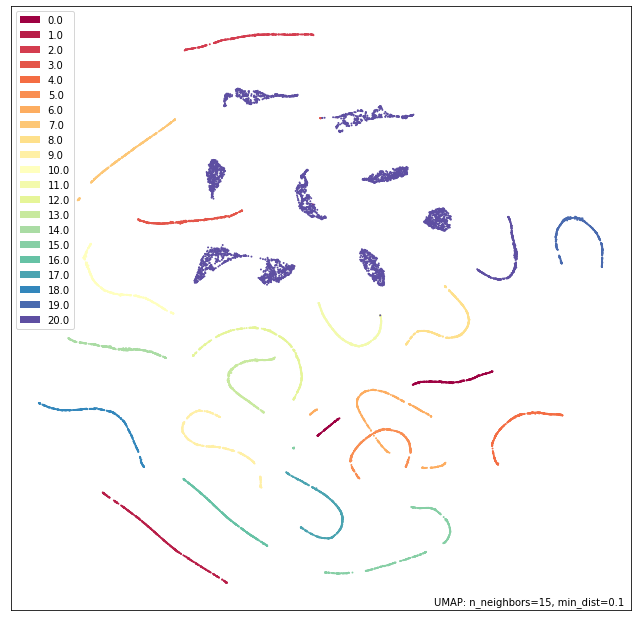

In [ ]:
umap.plot.points(mapper2, labels=labels_total)

In [ ]:
c = ["DL Alpha Alanine","DL Aspartic Acid","DL Isoleucine","DL Leucine",
"DL Methionine", "DL Phenylalanine"
, "DL Serine"
, "DL Threonine"
, "DL Tyrosine"
, "DL Valine", "Glycine"
, "L Arginine HCl"
,"L Asparagine Monohydrate"
, "L Cystine", "L Glutamic Acid","L Histidine HCl",
"L Lysine HCl",
"L (+) Cysteine HCl",
 "L Proline","L Tryptophan", "Never seen before"]

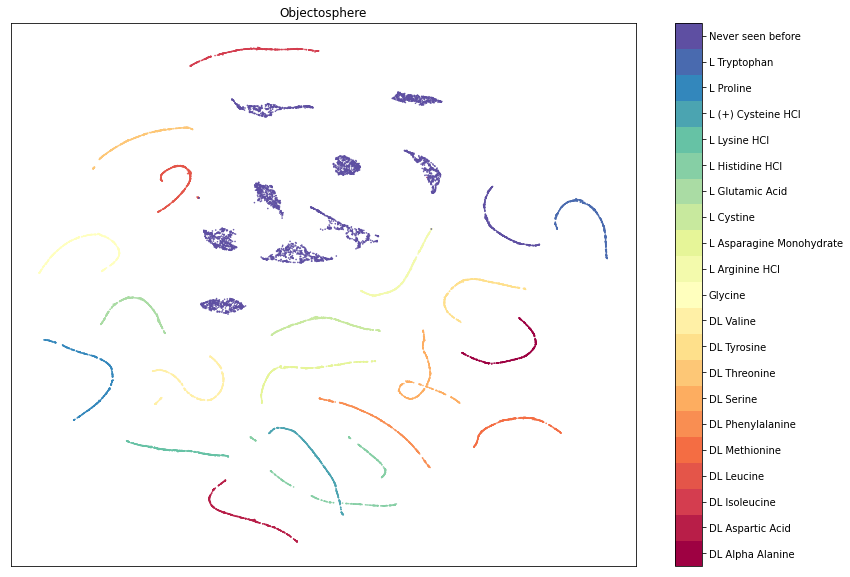

In [ ]:
embedding = umap.UMAP(n_neighbors=15,min_dist=0.1).fit_transform(predictions_total)

target = np.hstack(labels_total)

fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=0.3, c=target, cmap='Spectral', alpha=1.0)
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(22) -0.5)
cbar.set_ticks(np.arange(21))
cbar.set_ticklabels(c)
plt.title('Objectosphere');

In [ ]:
def misclassifyunknown(threshold):
  misclassifyunknown = 0
  for i in range(prediction_unknown.shape[0]):
    if max(prediction_unknown[i]) > threshold:
      misclassifyunknown += 1
  return misclassifyunknown/(prediction_unknown.shape[0])

In [ ]:
misclassifyunknown(0.93)

0.0

In [ ]:
UnknownMisclassify = []
for i in range(90):
  UnknownMisclassify.append([0.1 + 0.01*i,100*misclassifyunknown(0.1 + 0.01*i)])
for i in range(10):
  UnknownMisclassify.append([0.99 + 0.001*i,100*misclassifyunknown(0.99 + 0.001*i)])
UnknownMisclassify

[[0.1, 100.0],
 [0.11, 100.0],
 [0.12000000000000001, 100.0],
 [0.13, 100.0],
 [0.14, 100.0],
 [0.15000000000000002, 100.0],
 [0.16, 100.0],
 [0.17, 100.0],
 [0.18, 99.96000000000001],
 [0.19, 99.78],
 [0.2, 99.22],
 [0.21000000000000002, 97.68],
 [0.22, 95.32000000000001],
 [0.23, 91.97999999999999],
 [0.24000000000000002, 88.5],
 [0.25, 85.64],
 [0.26, 82.48],
 [0.27, 80.17999999999999],
 [0.28, 78.0],
 [0.29000000000000004, 75.88000000000001],
 [0.30000000000000004, 73.54],
 [0.31, 71.44],
 [0.32, 69.14],
 [0.33, 67.12],
 [0.33999999999999997, 64.53999999999999],
 [0.35, 62.2],
 [0.36, 59.98],
 [0.37, 57.66],
 [0.38, 55.84],
 [0.39, 54.0],
 [0.4, 52.22],
 [0.41000000000000003, 50.62],
 [0.42000000000000004, 49.16],
 [0.43000000000000005, 47.92],
 [0.44000000000000006, 46.78],
 [0.45000000000000007, 45.92],
 [0.45999999999999996, 44.96],
 [0.47, 44.080000000000005],
 [0.48, 43.44],
 [0.49, 42.9],
 [0.5, 42.54],
 [0.51, 42.08],
 [0.52, 41.18],
 [0.53, 33.040000000000006],
 [0.54, 31.2

In [ ]:
def thresholding(threshold):
  true = 0
  for i in range(prediction_test.shape[0]):
    if prediction_test.argmax(axis=1)[i] == int(test_label[i]) and max(prediction_test[i]) > threshold:
      true += 1
  return true/(prediction_test.shape[0])

In [ ]:
CorrectThresholding = []
for i in range(90):
  CorrectThresholding.append([0.1 + 0.01*i,100*thresholding(0.1 + 0.01*i)])
for i in range(10):
  CorrectThresholding.append([0.99 + 0.001*i,100*thresholding(0.99 + 0.001*i)])
CorrectThresholding

[[0.1, 99.99],
 [0.11, 99.99],
 [0.12000000000000001, 99.99],
 [0.13, 99.99],
 [0.14, 99.99],
 [0.15000000000000002, 99.99],
 [0.16, 99.99],
 [0.17, 99.99],
 [0.18, 99.99],
 [0.19, 99.99],
 [0.2, 99.99],
 [0.21000000000000002, 99.99],
 [0.22, 99.99],
 [0.23, 99.99],
 [0.24000000000000002, 99.99],
 [0.25, 99.99],
 [0.26, 99.99],
 [0.27, 99.99],
 [0.28, 99.99],
 [0.29000000000000004, 99.99],
 [0.30000000000000004, 99.99],
 [0.31, 99.99],
 [0.32, 99.99],
 [0.33, 99.99],
 [0.33999999999999997, 99.99],
 [0.35, 99.99],
 [0.36, 99.99],
 [0.37, 99.99],
 [0.38, 99.98],
 [0.39, 99.98],
 [0.4, 99.98],
 [0.41000000000000003, 99.98],
 [0.42000000000000004, 99.98],
 [0.43000000000000005, 99.98],
 [0.44000000000000006, 99.98],
 [0.45000000000000007, 99.98],
 [0.45999999999999996, 99.98],
 [0.47, 99.98],
 [0.48, 99.98],
 [0.49, 99.98],
 [0.5, 99.98],
 [0.51, 99.98],
 [0.52, 99.97],
 [0.53, 99.97],
 [0.54, 99.97],
 [0.55, 99.97],
 [0.56, 99.97],
 [0.5700000000000001, 99.97],
 [0.58, 99.97],
 [0.59, 99.

In [ ]:
def dontknow(threshold):
  notknown = 0
  for i in range(prediction_test.shape[0]):
    if max(prediction_test[i]) <= threshold:
      notknown += 1
  return notknown/(prediction_test.shape[0])

In [ ]:
DontKnowThresholding = []
for i in range(90):
  DontKnowThresholding.append([0.1 + 0.01*i,100*dontknow(0.1 + 0.01*i)])
for i in range(10):
  DontKnowThresholding.append([0.99 + 0.001*i,100*dontknow(0.99 + 0.001*i)])
DontKnowThresholding

[[0.1, 0.0],
 [0.11, 0.0],
 [0.12000000000000001, 0.0],
 [0.13, 0.0],
 [0.14, 0.0],
 [0.15000000000000002, 0.0],
 [0.16, 0.0],
 [0.17, 0.0],
 [0.18, 0.0],
 [0.19, 0.0],
 [0.2, 0.0],
 [0.21000000000000002, 0.0],
 [0.22, 0.0],
 [0.23, 0.0],
 [0.24000000000000002, 0.0],
 [0.25, 0.0],
 [0.26, 0.0],
 [0.27, 0.0],
 [0.28, 0.0],
 [0.29000000000000004, 0.0],
 [0.30000000000000004, 0.0],
 [0.31, 0.0],
 [0.32, 0.0],
 [0.33, 0.0],
 [0.33999999999999997, 0.0],
 [0.35, 0.01],
 [0.36, 0.01],
 [0.37, 0.01],
 [0.38, 0.02],
 [0.39, 0.02],
 [0.4, 0.02],
 [0.41000000000000003, 0.02],
 [0.42000000000000004, 0.02],
 [0.43000000000000005, 0.02],
 [0.44000000000000006, 0.02],
 [0.45000000000000007, 0.02],
 [0.45999999999999996, 0.02],
 [0.47, 0.02],
 [0.48, 0.02],
 [0.49, 0.02],
 [0.5, 0.02],
 [0.51, 0.02],
 [0.52, 0.03],
 [0.53, 0.03],
 [0.54, 0.03],
 [0.55, 0.03],
 [0.56, 0.03],
 [0.5700000000000001, 0.03],
 [0.58, 0.03],
 [0.59, 0.03],
 [0.6, 0.03],
 [0.61, 0.03],
 [0.62, 0.03],
 [0.63, 0.03],
 [0.64, 0.0

In [ ]:
prediction1_ignored = res_net1.predict(ignored_data_rescaled)
prediction2_ignored = res_net2.predict(ignored_data_rescaled)
prediction3_ignored = res_net3.predict(ignored_data_rescaled)
prediction4_ignored = res_net4.predict(ignored_data_rescaled)
prediction5_ignored = res_net5.predict(ignored_data_rescaled)

prediction_ignored = (prediction1_ignored + prediction2_ignored + prediction3_ignored + prediction4_ignored + prediction5_ignored)/5

In [ ]:
def misclassifyignore(threshold):
  misclassifyignore = 0
  for i in range(prediction_ignored.shape[0]):
    if max(prediction_ignored[i]) > threshold:
      misclassifyignore += 1
  return misclassifyignore/(prediction_ignored.shape[0])

In [ ]:
IgnoreThresholding = []
for i in range(90):
  IgnoreThresholding.append([0.1 + 0.01*i,100*misclassifyignore(0.1 + 0.01*i)])
for i in range(10):
  IgnoreThresholding.append([0.99 + 0.001*i,100*misclassifyignore(0.99 + 0.001*i)])
IgnoreThresholding

[[0.1, 100.0],
 [0.11, 100.0],
 [0.12000000000000001, 100.0],
 [0.13, 100.0],
 [0.14, 100.0],
 [0.15000000000000002, 100.0],
 [0.16, 100.0],
 [0.17, 99.996],
 [0.18, 99.976],
 [0.19, 99.71600000000001],
 [0.2, 98.10799999999999],
 [0.21000000000000002, 95.78],
 [0.22, 94.188],
 [0.23, 93.2],
 [0.24000000000000002, 92.392],
 [0.25, 91.508],
 [0.26, 90.58],
 [0.27, 89.916],
 [0.28, 89.452],
 [0.29000000000000004, 88.752],
 [0.30000000000000004, 87.272],
 [0.31, 85.652],
 [0.32, 84.152],
 [0.33, 82.772],
 [0.33999999999999997, 81.404],
 [0.35, 80.06400000000001],
 [0.36, 78.664],
 [0.37, 77.268],
 [0.38, 75.756],
 [0.39, 74.044],
 [0.4, 72.096],
 [0.41000000000000003, 69.65599999999999],
 [0.42000000000000004, 66.836],
 [0.43000000000000005, 64.404],
 [0.44000000000000006, 62.892],
 [0.45000000000000007, 61.712],
 [0.45999999999999996, 60.56399999999999],
 [0.47, 59.376],
 [0.48, 58.204],
 [0.49, 57.06],
 [0.5, 55.720000000000006],
 [0.51, 54.376000000000005],
 [0.52, 53.108],
 [0.53, 51.

In [ ]:
def false_identify(threshold):
  false_identify = 0
  for i in range(prediction_test.shape[0]):
    if prediction_test.argmax(axis=1)[i] != int(test_label[i]) and max(prediction_test[i]) > threshold:
      false_identify += 1
  return false_identify/(prediction_test.shape[0])

In [ ]:
FalseIdentify = []
for i in range(90):
  FalseIdentify.append([0.1 + 0.01*i,100*false_identify(0.1 + 0.01*i)])
for i in range(10):
  FalseIdentify.append([0.99 + 0.001*i,100*false_identify(0.99 + 0.001*i)])
FalseIdentify

[[0.1, 0.01],
 [0.11, 0.01],
 [0.12000000000000001, 0.01],
 [0.13, 0.01],
 [0.14, 0.01],
 [0.15000000000000002, 0.01],
 [0.16, 0.01],
 [0.17, 0.01],
 [0.18, 0.01],
 [0.19, 0.01],
 [0.2, 0.01],
 [0.21000000000000002, 0.01],
 [0.22, 0.01],
 [0.23, 0.01],
 [0.24000000000000002, 0.01],
 [0.25, 0.01],
 [0.26, 0.01],
 [0.27, 0.01],
 [0.28, 0.01],
 [0.29000000000000004, 0.01],
 [0.30000000000000004, 0.01],
 [0.31, 0.01],
 [0.32, 0.01],
 [0.33, 0.01],
 [0.33999999999999997, 0.01],
 [0.35, 0.0],
 [0.36, 0.0],
 [0.37, 0.0],
 [0.38, 0.0],
 [0.39, 0.0],
 [0.4, 0.0],
 [0.41000000000000003, 0.0],
 [0.42000000000000004, 0.0],
 [0.43000000000000005, 0.0],
 [0.44000000000000006, 0.0],
 [0.45000000000000007, 0.0],
 [0.45999999999999996, 0.0],
 [0.47, 0.0],
 [0.48, 0.0],
 [0.49, 0.0],
 [0.5, 0.0],
 [0.51, 0.0],
 [0.52, 0.0],
 [0.53, 0.0],
 [0.54, 0.0],
 [0.55, 0.0],
 [0.56, 0.0],
 [0.5700000000000001, 0.0],
 [0.58, 0.0],
 [0.59, 0.0],
 [0.6, 0.0],
 [0.61, 0.0],
 [0.62, 0.0],
 [0.63, 0.0],
 [0.64, 0.0],
 